In [1]:
import torch
from torch import nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
import torchvision.transforms as transforms
import numpy as np
from utils import Encoder
from utils import Decoder
from utils import ED
from ConvLSTM import convlstm_encoder_params, convlstm_decoder_params
from mm import MovingMNIST


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
def imshow(img):
    img = img[0]
    img = torchvision.utils.make_grid(img)
    img = img.cpu()
    npimg = img.detach().numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Epoch [1/30], Step [1000/10000], Loss: 0.0524
Epoch [1/30], Step [2000/10000], Loss: 0.0533
Epoch [1/30], Step [3000/10000], Loss: 0.0532
Epoch [1/30], Step [4000/10000], Loss: 0.0425
Epoch [1/30], Step [5000/10000], Loss: 0.0514
Epoch [1/30], Step [6000/10000], Loss: 0.0456
Epoch [1/30], Step [7000/10000], Loss: 0.0509
Epoch [1/30], Step [8000/10000], Loss: 0.0487
Epoch [1/30], Step [9000/10000], Loss: 0.0489
Epoch [1/30], Step [10000/10000], Loss: 0.0479
Epoch [1/30], Step [1000/10000], Loss: 0.0510
Epoch [1/30], Step [2000/10000], Loss: 0.0467
Epoch [1/30], Step [3000/10000], Loss: 0.0501
Epoch [1/30], Step [4000/10000], Loss: 0.0455
Epoch [1/30], Step [5000/10000], Loss: 0.0482
Epoch [1/30], Step [6000/10000], Loss: 0.0466
Epoch [1/30], Step [7000/10000], Loss: 0.0502
Epoch [1/30], Step [8000/10000], Loss: 0.0497
Epoch [1/30], Step [9000/10000], Loss: 0.0504
Epoch [1/30], Step [10000/10000], Loss: 0.0507
Epoch [2/30], Step [1000/10000], Loss: 0.0488
Epoch [2/30], Step [2000/10000],

Epoch [9/30], Step [9000/10000], Loss: 0.0501
Epoch [9/30], Step [10000/10000], Loss: 0.0483
Epoch [10/30], Step [1000/10000], Loss: 0.0480
Epoch [10/30], Step [2000/10000], Loss: 0.0511
Epoch [10/30], Step [3000/10000], Loss: 0.0836
Epoch [10/30], Step [4000/10000], Loss: 0.0618
Epoch [10/30], Step [5000/10000], Loss: 0.0496
Epoch [10/30], Step [6000/10000], Loss: 0.0543
Epoch [10/30], Step [7000/10000], Loss: 0.0482
Epoch [10/30], Step [8000/10000], Loss: 0.0513
Epoch [10/30], Step [9000/10000], Loss: 0.0495
Epoch [10/30], Step [10000/10000], Loss: 0.0491
Epoch [10/30], Step [1000/10000], Loss: 0.0514
Epoch [10/30], Step [2000/10000], Loss: 0.0466
Epoch [10/30], Step [3000/10000], Loss: 0.0490
Epoch [10/30], Step [4000/10000], Loss: 0.0494
Epoch [10/30], Step [5000/10000], Loss: 0.0526
Epoch [10/30], Step [6000/10000], Loss: 0.0478
Epoch [10/30], Step [7000/10000], Loss: 0.0548
Epoch [10/30], Step [8000/10000], Loss: 0.0466
Epoch [10/30], Step [9000/10000], Loss: 0.0442
Epoch [10/30]

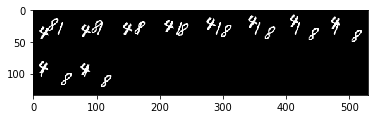

label


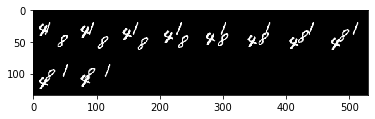

prediction


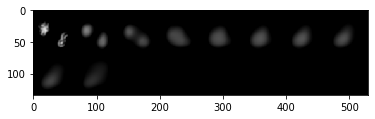

Epoch [15/30], Step [1000/10000], Loss: 0.0481
input


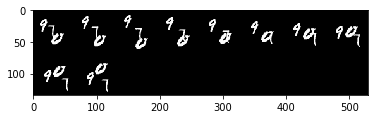

label


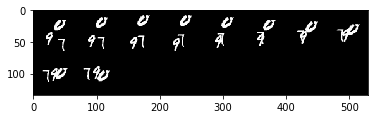

prediction


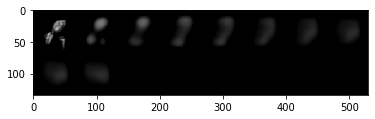

Epoch [15/30], Step [2000/10000], Loss: 0.0465
input


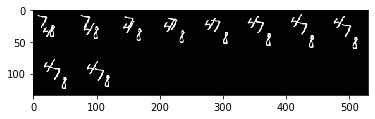

label


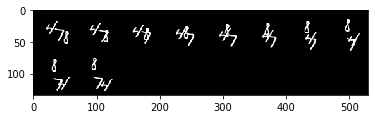

prediction


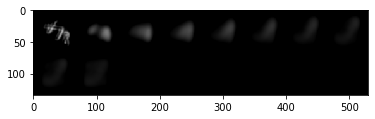

Epoch [15/30], Step [3000/10000], Loss: 0.0464
input


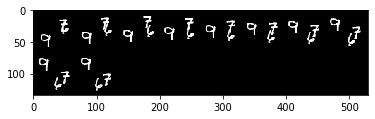

label


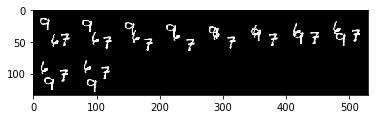

prediction


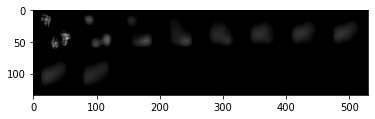

Epoch [15/30], Step [4000/10000], Loss: 0.0489
input


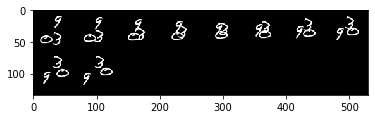

label


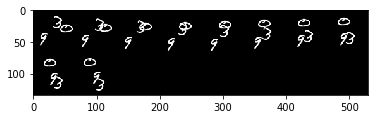

prediction


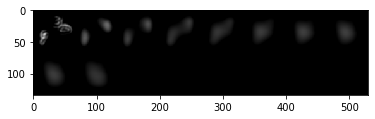

Epoch [15/30], Step [5000/10000], Loss: 0.0474
input


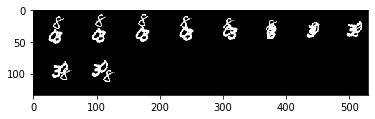

label


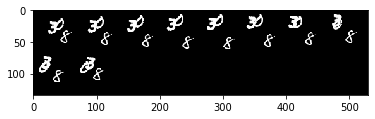

prediction


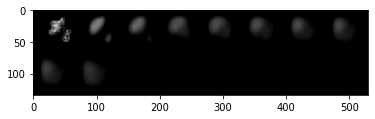

Epoch [15/30], Step [6000/10000], Loss: 0.0490
input


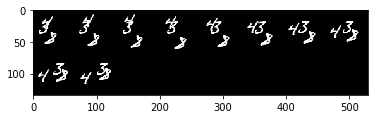

label


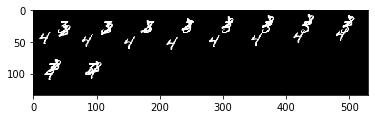

prediction


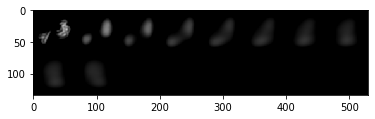

Epoch [15/30], Step [7000/10000], Loss: 0.0546
input


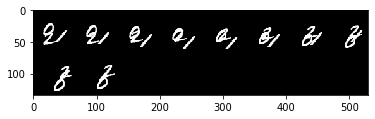

label


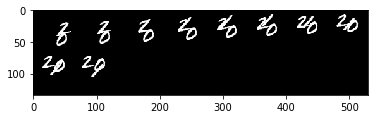

prediction


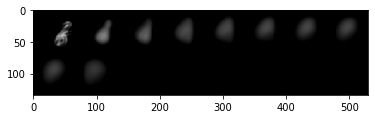

Epoch [15/30], Step [8000/10000], Loss: 0.0530
input


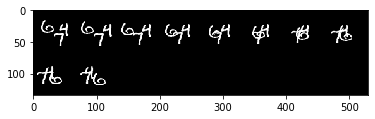

label


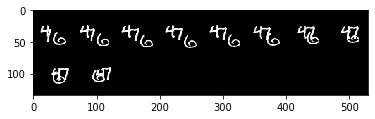

prediction


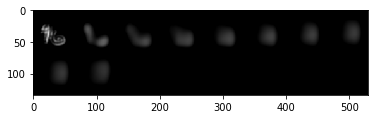

Epoch [15/30], Step [9000/10000], Loss: 0.0449
input


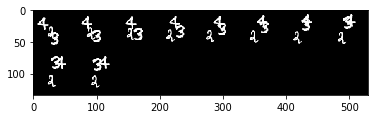

label


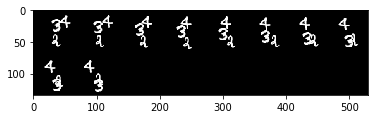

prediction


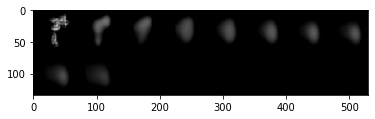

Epoch [15/30], Step [10000/10000], Loss: 0.0433
Epoch [16/30], Step [1000/10000], Loss: 0.0479
Epoch [16/30], Step [2000/10000], Loss: 0.0420
Epoch [16/30], Step [3000/10000], Loss: 0.0475
Epoch [16/30], Step [4000/10000], Loss: 0.0452
Epoch [16/30], Step [5000/10000], Loss: 0.0526
Epoch [16/30], Step [6000/10000], Loss: 0.0441
Epoch [16/30], Step [7000/10000], Loss: 0.0468
Epoch [16/30], Step [8000/10000], Loss: 0.0449
Epoch [16/30], Step [9000/10000], Loss: 0.0443
Epoch [16/30], Step [10000/10000], Loss: 0.0448
input


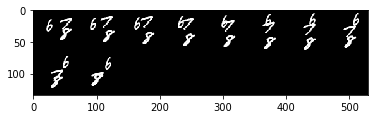

label


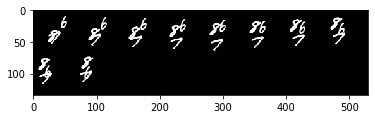

prediction


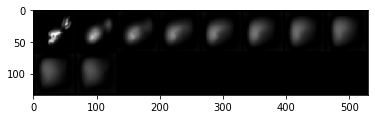

Epoch [16/30], Step [1000/10000], Loss: 0.0420
input


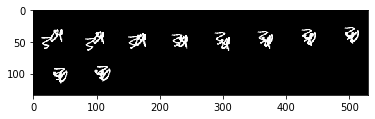

label


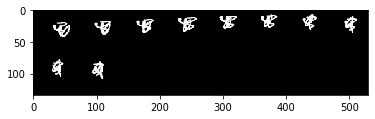

prediction


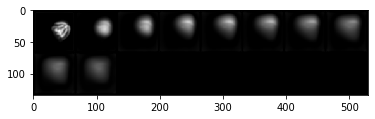

Epoch [16/30], Step [2000/10000], Loss: 0.0431
input


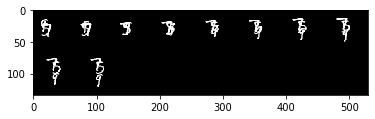

label


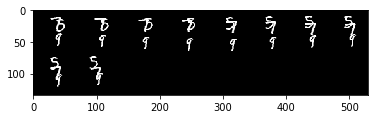

prediction


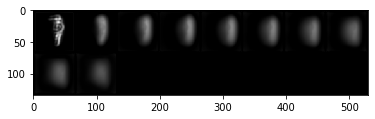

Epoch [16/30], Step [3000/10000], Loss: 0.0416
input


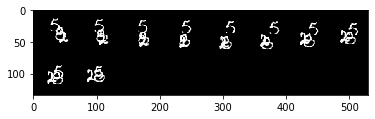

label


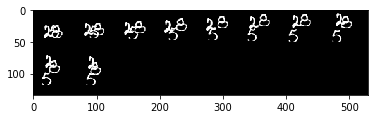

prediction


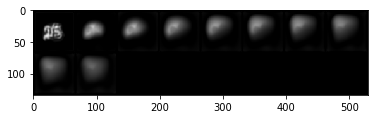

Epoch [16/30], Step [4000/10000], Loss: 0.0424
input


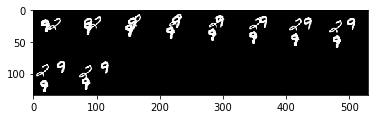

label


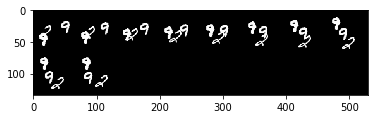

prediction


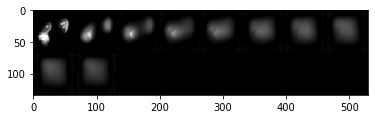

Epoch [16/30], Step [5000/10000], Loss: 0.0475
input


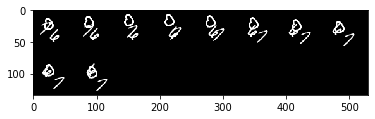

label


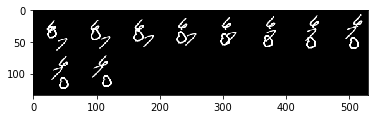

prediction


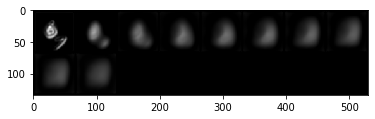

Epoch [16/30], Step [6000/10000], Loss: 0.0465
input


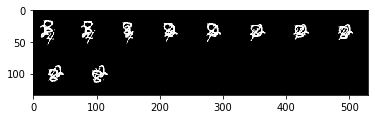

label


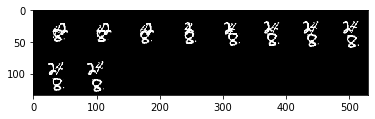

prediction


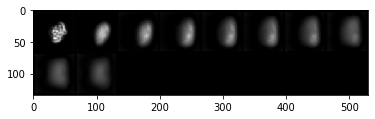

Epoch [16/30], Step [7000/10000], Loss: 0.0473
input


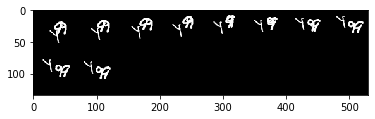

label


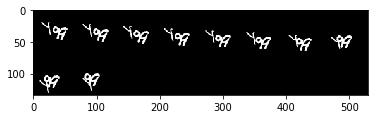

prediction


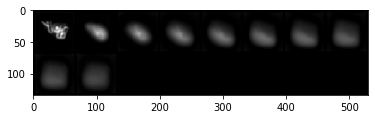

Epoch [16/30], Step [8000/10000], Loss: 0.0414
input


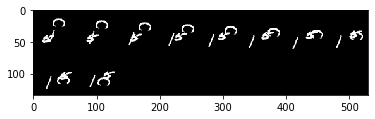

label


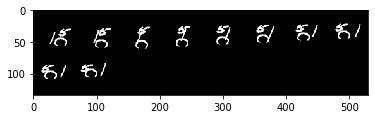

prediction


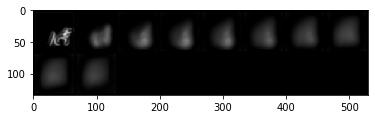

Epoch [16/30], Step [9000/10000], Loss: 0.0416
input


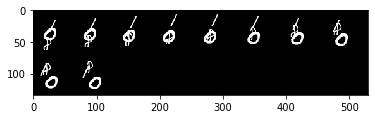

label


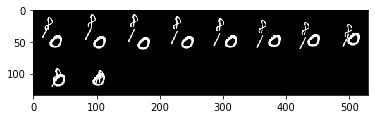

prediction


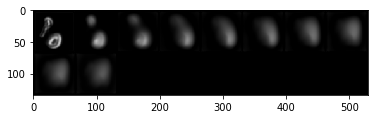

Epoch [16/30], Step [10000/10000], Loss: 0.0433
Epoch [17/30], Step [1000/10000], Loss: 0.0459
Epoch [17/30], Step [2000/10000], Loss: 0.0416
Epoch [17/30], Step [3000/10000], Loss: 0.0477
Epoch [17/30], Step [4000/10000], Loss: 0.0431
Epoch [17/30], Step [5000/10000], Loss: 0.0501
Epoch [17/30], Step [6000/10000], Loss: 0.0451
Epoch [17/30], Step [7000/10000], Loss: 0.0470
Epoch [17/30], Step [8000/10000], Loss: 0.0404
Epoch [17/30], Step [9000/10000], Loss: 0.0481
Epoch [17/30], Step [10000/10000], Loss: 0.0444
input


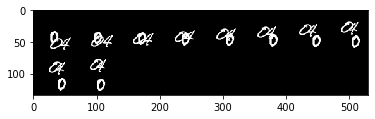

label


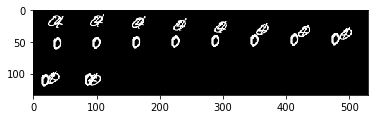

prediction


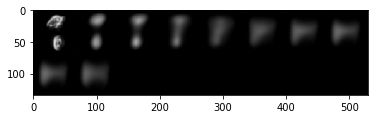

Epoch [17/30], Step [1000/10000], Loss: 0.0441
input


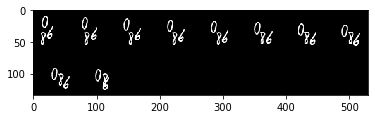

label


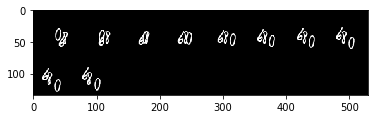

prediction


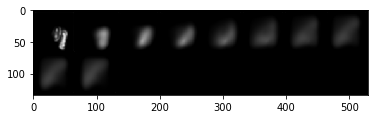

Epoch [17/30], Step [2000/10000], Loss: 0.0429
input


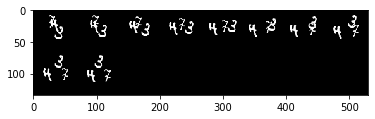

label


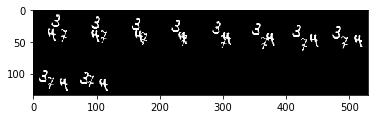

prediction


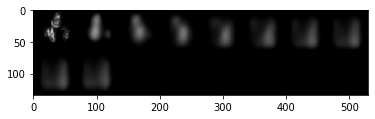

Epoch [17/30], Step [3000/10000], Loss: 0.0412
input


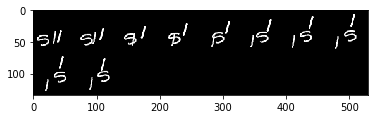

label


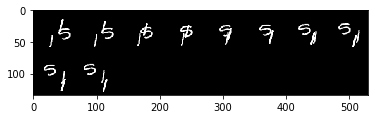

prediction


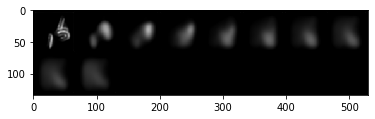

Epoch [17/30], Step [4000/10000], Loss: 0.0413
input


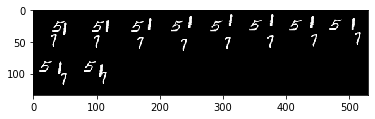

label


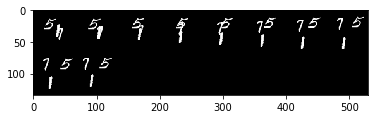

prediction


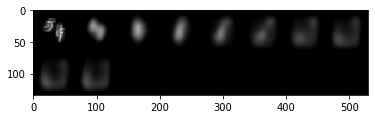

Epoch [17/30], Step [5000/10000], Loss: 0.0444
input


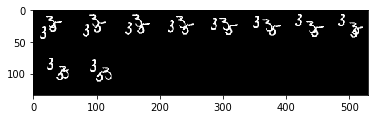

label


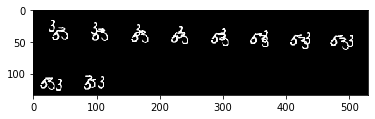

prediction


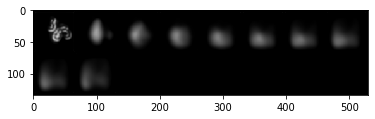

Epoch [17/30], Step [6000/10000], Loss: 0.0389
input


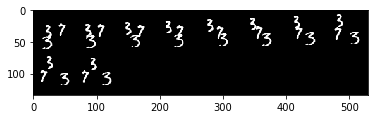

label


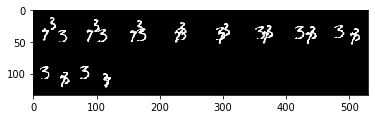

prediction


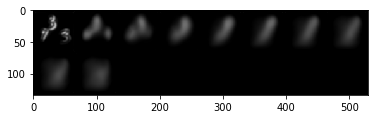

Epoch [17/30], Step [7000/10000], Loss: 0.0420
input


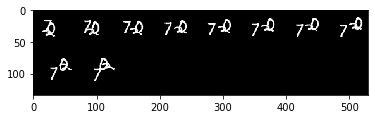

label


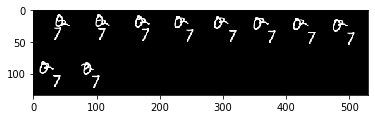

prediction


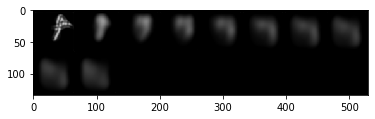

Epoch [17/30], Step [8000/10000], Loss: 0.0366
input


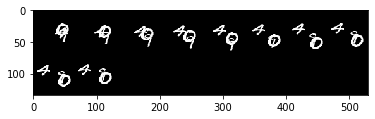

label


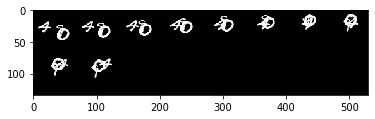

prediction


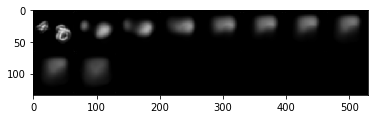

Epoch [17/30], Step [9000/10000], Loss: 0.0399
input


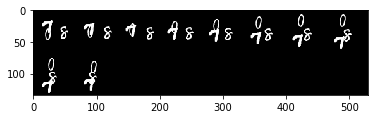

label


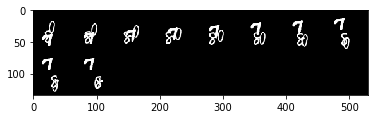

prediction


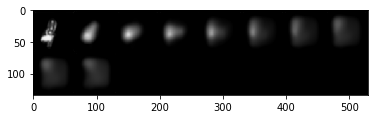

Epoch [17/30], Step [10000/10000], Loss: 0.0471
Epoch [18/30], Step [1000/10000], Loss: 0.0463
Epoch [18/30], Step [2000/10000], Loss: 0.0451
Epoch [18/30], Step [3000/10000], Loss: 0.0437
Epoch [18/30], Step [4000/10000], Loss: 0.0474
Epoch [18/30], Step [5000/10000], Loss: 0.0398
Epoch [18/30], Step [6000/10000], Loss: 0.0462
Epoch [18/30], Step [7000/10000], Loss: 0.0434
Epoch [18/30], Step [8000/10000], Loss: 0.0417
Epoch [18/30], Step [9000/10000], Loss: 0.0447
Epoch [18/30], Step [10000/10000], Loss: 0.0436
input


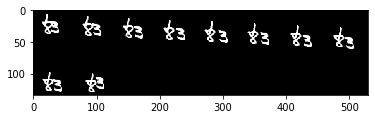

label


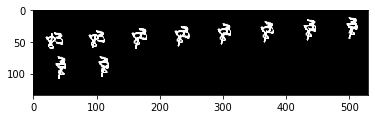

prediction


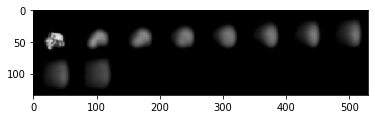

Epoch [18/30], Step [1000/10000], Loss: 0.0426
input


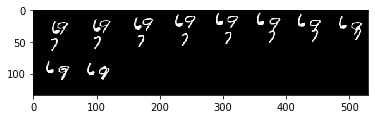

label


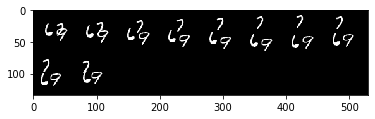

prediction


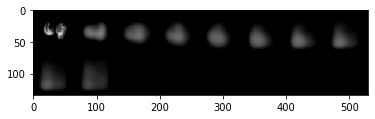

Epoch [18/30], Step [2000/10000], Loss: 0.0446
input


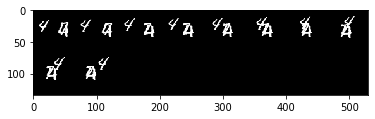

label


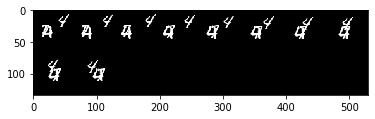

prediction


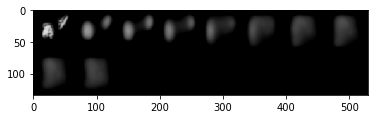

Epoch [18/30], Step [3000/10000], Loss: 0.0421
input


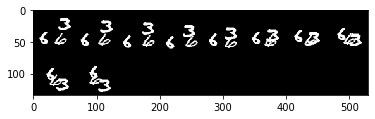

label


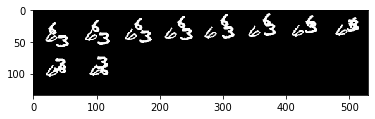

prediction


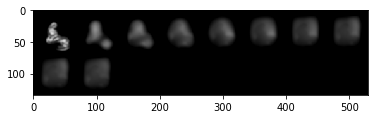

Epoch [18/30], Step [4000/10000], Loss: 0.0421
input


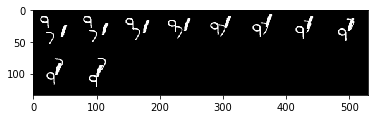

label


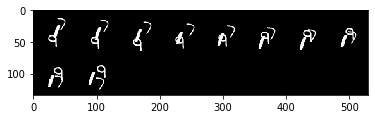

prediction


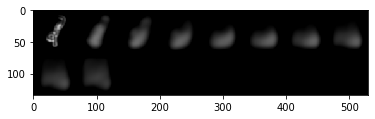

Epoch [18/30], Step [5000/10000], Loss: 0.0394
input


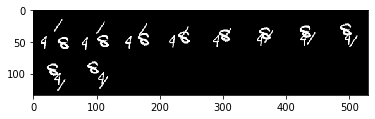

label


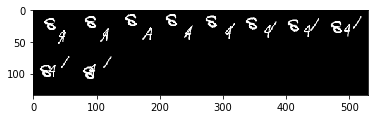

prediction


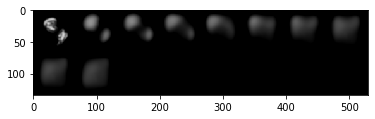

Epoch [18/30], Step [6000/10000], Loss: 0.0414
input


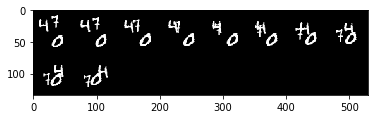

label


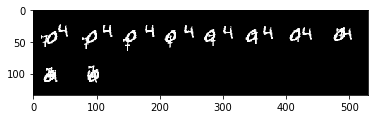

prediction


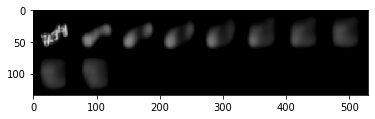

Epoch [18/30], Step [7000/10000], Loss: 0.0453
input


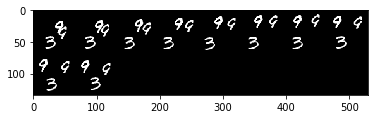

label


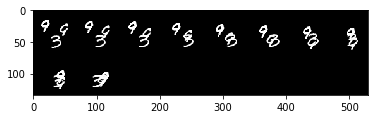

prediction


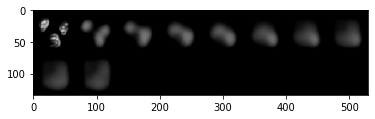

Epoch [18/30], Step [8000/10000], Loss: 0.0413
input


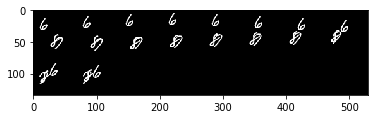

label


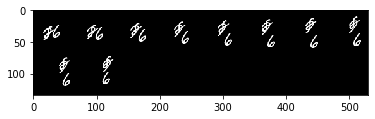

prediction


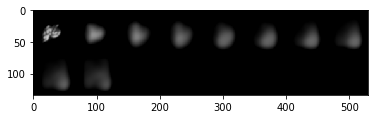

Epoch [18/30], Step [9000/10000], Loss: 0.0433
input


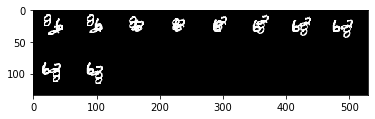

label


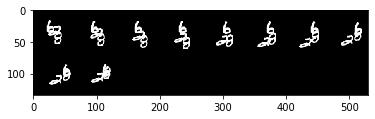

prediction


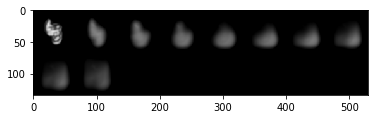

Epoch [18/30], Step [10000/10000], Loss: 0.0418
Epoch [19/30], Step [1000/10000], Loss: 0.0423
Epoch [19/30], Step [2000/10000], Loss: 0.0535
Epoch [19/30], Step [3000/10000], Loss: 0.0437
Epoch [19/30], Step [4000/10000], Loss: 0.0757
Epoch [19/30], Step [5000/10000], Loss: 0.0464
Epoch [19/30], Step [6000/10000], Loss: 0.0416
Epoch [19/30], Step [7000/10000], Loss: 0.0417
Epoch [19/30], Step [8000/10000], Loss: 0.0380
Epoch [19/30], Step [9000/10000], Loss: 0.0456
Epoch [19/30], Step [10000/10000], Loss: 0.0447
input


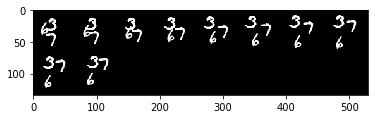

label


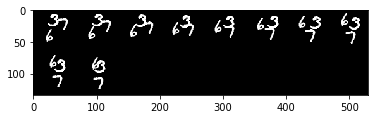

prediction


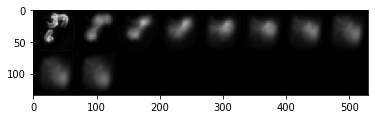

Epoch [19/30], Step [1000/10000], Loss: 0.0411
input


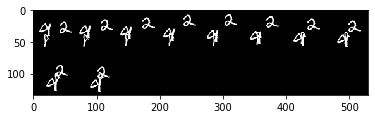

label


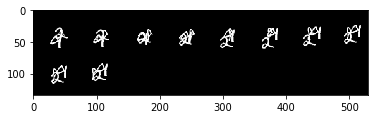

prediction


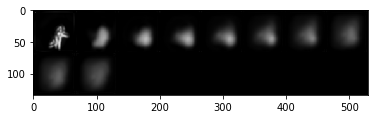

Epoch [19/30], Step [2000/10000], Loss: 0.0431
input


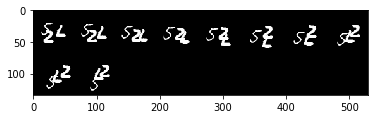

label


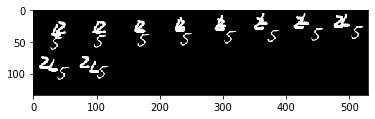

prediction


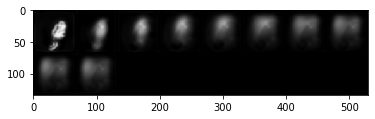

Epoch [19/30], Step [3000/10000], Loss: 0.0432
input


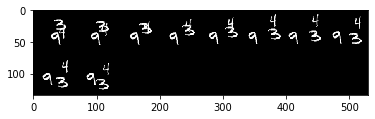

label


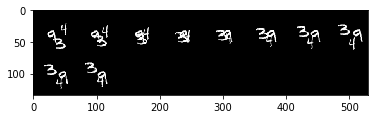

prediction


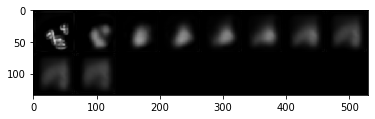

Epoch [19/30], Step [4000/10000], Loss: 0.0464
input


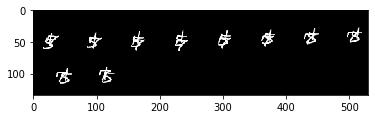

label


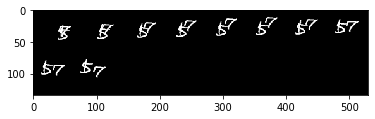

prediction


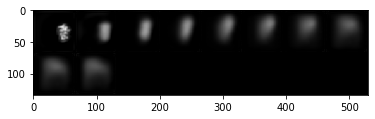

Epoch [19/30], Step [5000/10000], Loss: 0.0412
input


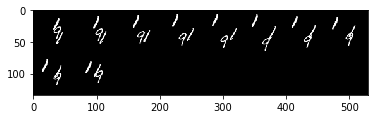

label


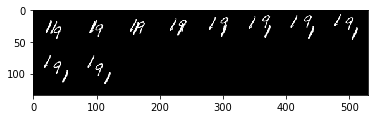

prediction


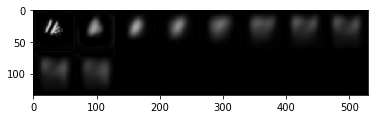

Epoch [19/30], Step [6000/10000], Loss: 0.0411
input


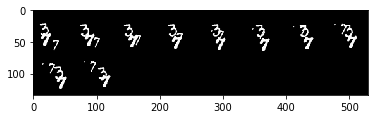

label


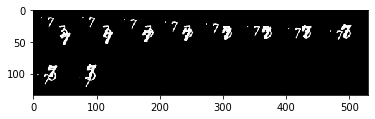

prediction


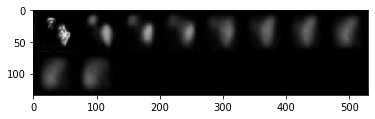

Epoch [19/30], Step [7000/10000], Loss: 0.0376
input


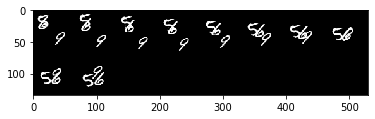

label


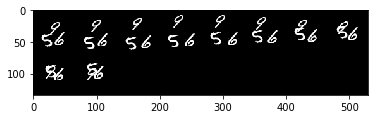

prediction


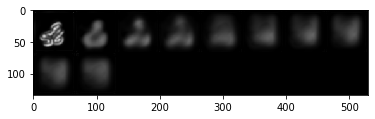

Epoch [19/30], Step [8000/10000], Loss: 0.0444
input


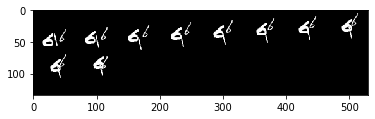

label


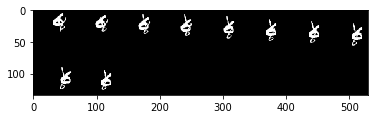

prediction


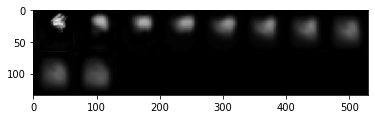

Epoch [19/30], Step [9000/10000], Loss: 0.0392
input


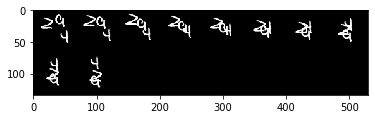

label


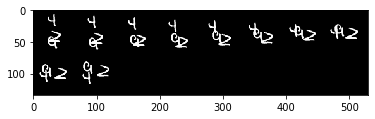

prediction


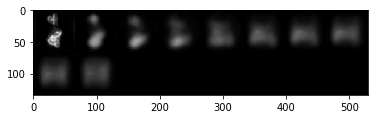

Epoch [19/30], Step [10000/10000], Loss: 0.0403
Epoch [20/30], Step [1000/10000], Loss: 0.0451
Epoch [20/30], Step [2000/10000], Loss: 0.0423
Epoch [20/30], Step [3000/10000], Loss: 0.0457
Epoch [20/30], Step [4000/10000], Loss: 0.0502
Epoch [20/30], Step [5000/10000], Loss: 0.0420
Epoch [20/30], Step [6000/10000], Loss: 0.0428
Epoch [20/30], Step [7000/10000], Loss: 0.0395
Epoch [20/30], Step [8000/10000], Loss: 0.0389
Epoch [20/30], Step [9000/10000], Loss: 0.0413
Epoch [20/30], Step [10000/10000], Loss: 0.0402
input


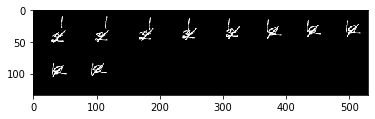

label


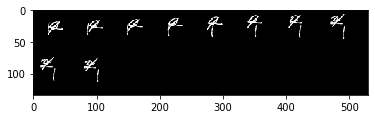

prediction


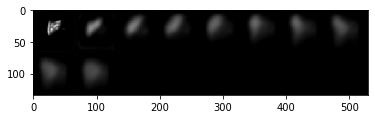

Epoch [20/30], Step [1000/10000], Loss: 0.0372
input


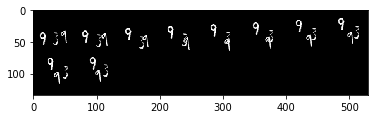

label


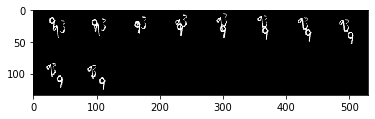

prediction


Epoch [20/30], Step [2000/10000], Loss: 0.0383
input


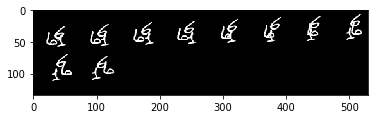

label


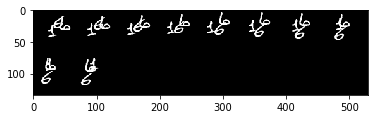

prediction


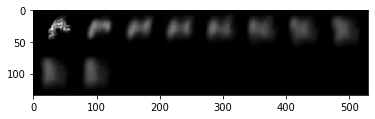

Epoch [20/30], Step [3000/10000], Loss: 0.0360
input


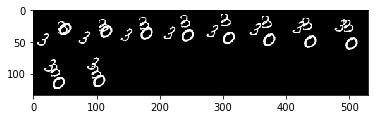

label


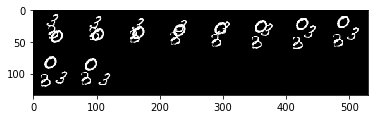

prediction


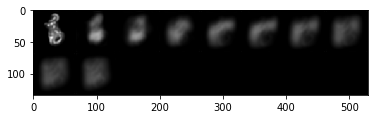

Epoch [20/30], Step [4000/10000], Loss: 0.0406
input


label


prediction


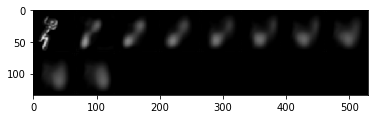

Epoch [20/30], Step [5000/10000], Loss: 0.0380
input


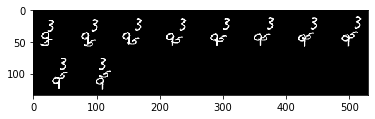

label


prediction


Epoch [20/30], Step [6000/10000], Loss: 0.0447
input


label


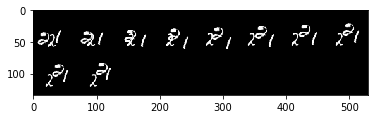

prediction


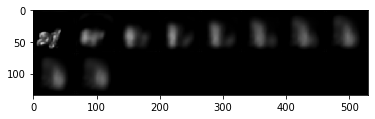

Epoch [20/30], Step [7000/10000], Loss: 0.0394
input


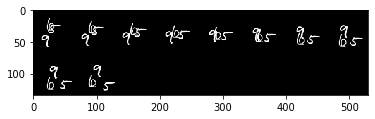

label


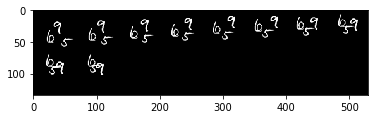

prediction


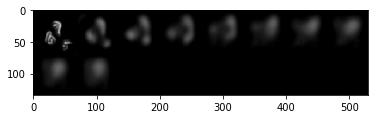

Epoch [20/30], Step [8000/10000], Loss: 0.0374
input


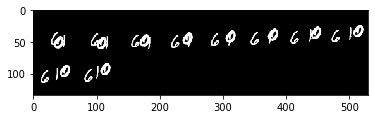

label


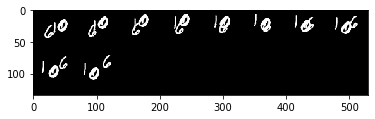

prediction


Epoch [20/30], Step [9000/10000], Loss: 0.0394
input


label


prediction


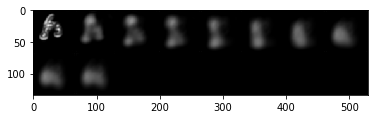

Epoch [20/30], Step [10000/10000], Loss: 0.0377
Epoch [21/30], Step [1000/10000], Loss: 0.0418
Epoch [21/30], Step [2000/10000], Loss: 0.0485
Epoch [21/30], Step [3000/10000], Loss: 0.0387
Epoch [21/30], Step [4000/10000], Loss: 0.0409
Epoch [21/30], Step [5000/10000], Loss: 0.0394
Epoch [21/30], Step [6000/10000], Loss: 0.0413
Epoch [21/30], Step [7000/10000], Loss: 0.2851
Epoch [21/30], Step [8000/10000], Loss: 0.0459
Epoch [21/30], Step [9000/10000], Loss: 0.0577
Epoch [21/30], Step [10000/10000], Loss: 0.0481
input


label


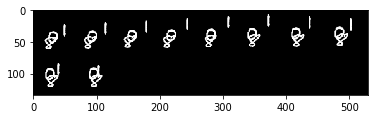

prediction


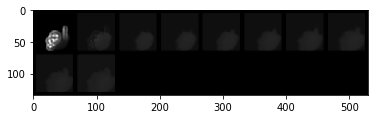

Epoch [21/30], Step [1000/10000], Loss: 0.0525
input


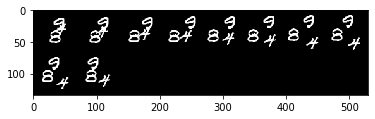

label


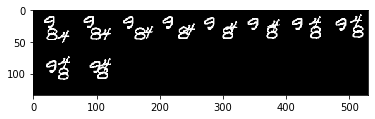

prediction


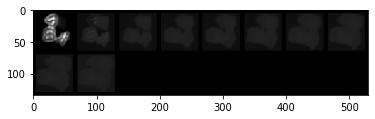

Epoch [21/30], Step [2000/10000], Loss: 0.0532
input


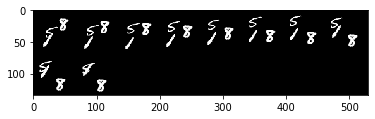

label


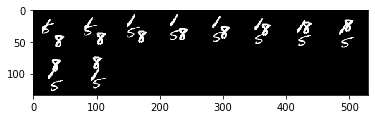

prediction


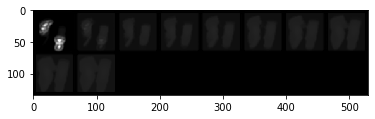

Epoch [21/30], Step [3000/10000], Loss: 0.0502
input


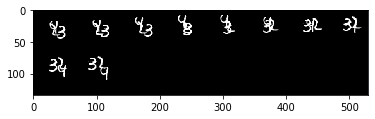

label


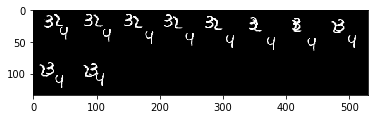

prediction


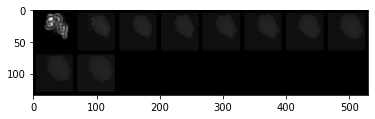

Epoch [21/30], Step [4000/10000], Loss: 0.0526
input


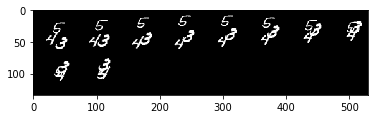

label


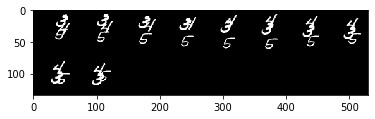

prediction


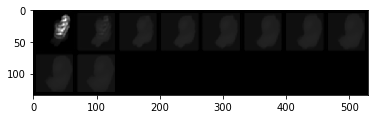

Epoch [21/30], Step [5000/10000], Loss: 0.0525
input


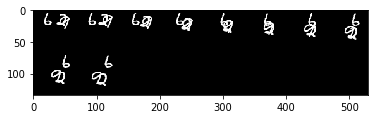

label


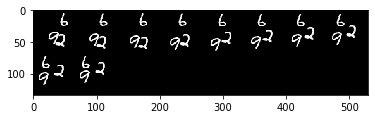

prediction


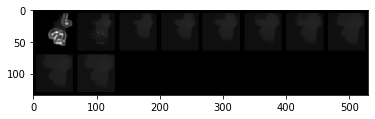

Epoch [21/30], Step [6000/10000], Loss: 0.0545
input


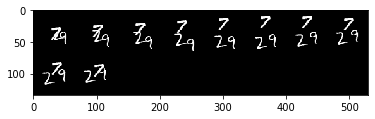

label


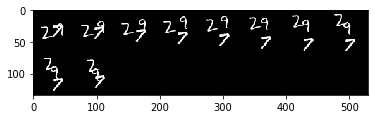

prediction


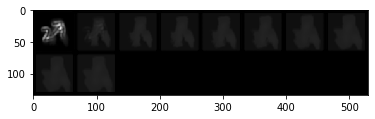

Epoch [21/30], Step [7000/10000], Loss: 0.0495
input


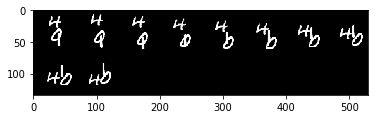

label


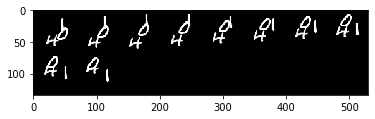

prediction


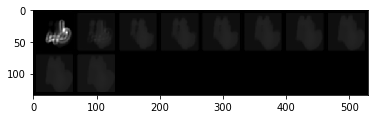

Epoch [21/30], Step [8000/10000], Loss: 0.0543
input


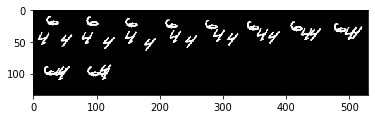

label


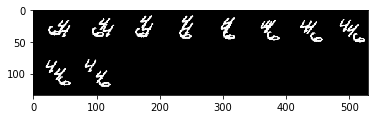

prediction


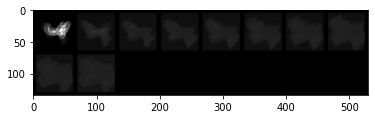

Epoch [21/30], Step [9000/10000], Loss: 0.0547
input


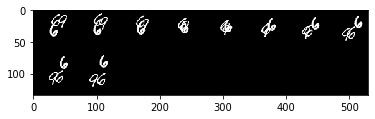

label


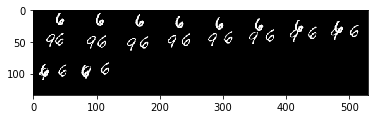

prediction


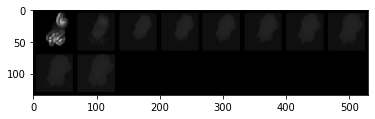

Epoch [21/30], Step [10000/10000], Loss: 0.0476
Epoch [22/30], Step [1000/10000], Loss: 0.0509
Epoch [22/30], Step [2000/10000], Loss: 0.0503
Epoch [22/30], Step [3000/10000], Loss: 0.0524
Epoch [22/30], Step [4000/10000], Loss: 0.0505
Epoch [22/30], Step [5000/10000], Loss: 0.0489
Epoch [22/30], Step [6000/10000], Loss: 0.0445
Epoch [22/30], Step [7000/10000], Loss: 0.0553
Epoch [22/30], Step [8000/10000], Loss: 0.0538
Epoch [22/30], Step [9000/10000], Loss: 0.0517
Epoch [22/30], Step [10000/10000], Loss: 0.0496
input


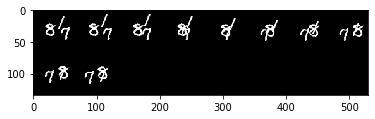

label


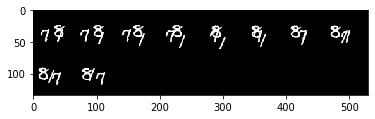

prediction


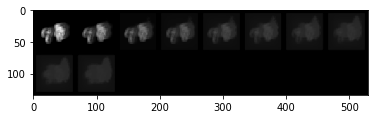

Epoch [22/30], Step [1000/10000], Loss: 0.0531
input


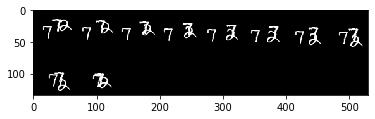

label


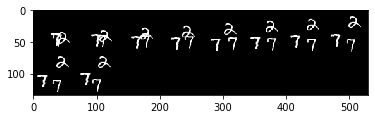

prediction


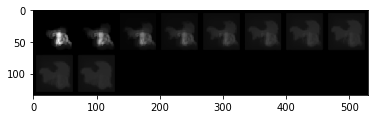

Epoch [22/30], Step [2000/10000], Loss: 0.0524
input


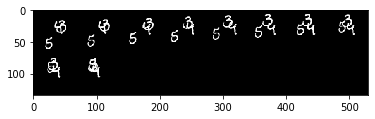

label


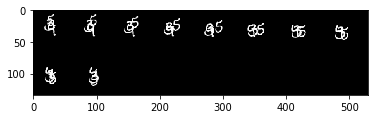

prediction


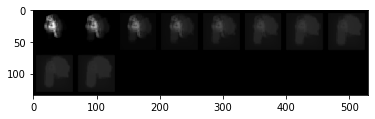

Epoch [22/30], Step [3000/10000], Loss: 0.0476
input


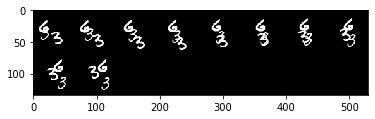

label


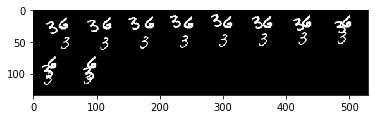

prediction


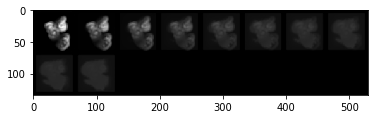

Epoch [22/30], Step [4000/10000], Loss: 0.0478
input


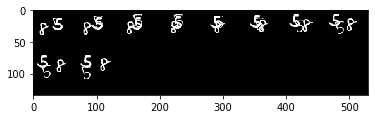

label


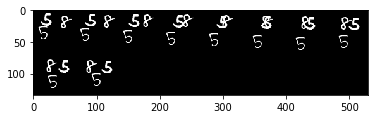

prediction


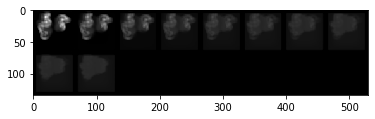

Epoch [22/30], Step [5000/10000], Loss: 0.0495
input


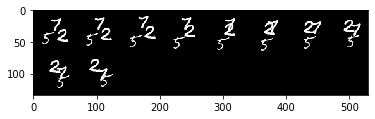

label


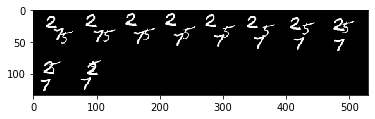

prediction


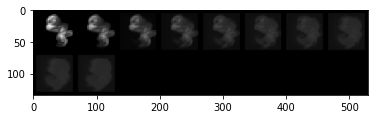

Epoch [22/30], Step [6000/10000], Loss: 0.0521
input


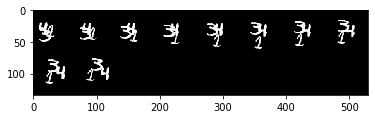

label


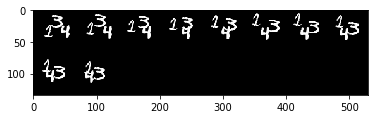

prediction


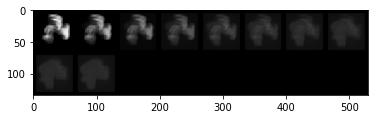

Epoch [22/30], Step [7000/10000], Loss: 0.0483
input


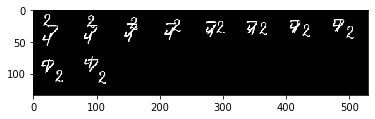

label


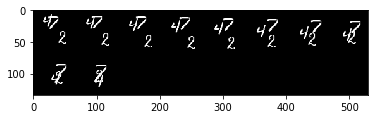

prediction


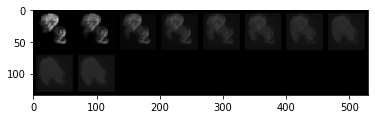

Epoch [22/30], Step [8000/10000], Loss: 0.0504
input


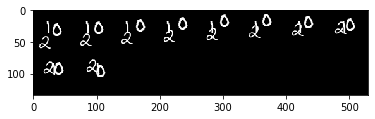

label


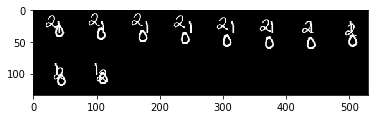

prediction


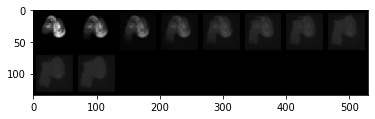

Epoch [22/30], Step [9000/10000], Loss: 0.0469
input


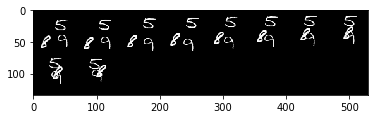

label


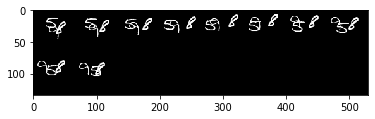

prediction


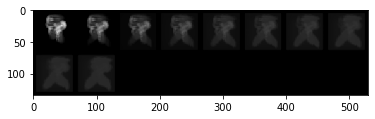

Epoch [22/30], Step [10000/10000], Loss: 0.0484
Epoch [23/30], Step [1000/10000], Loss: 0.0489
Epoch [23/30], Step [2000/10000], Loss: 0.0479
Epoch [23/30], Step [3000/10000], Loss: 0.0460
Epoch [23/30], Step [4000/10000], Loss: 0.0497
Epoch [23/30], Step [5000/10000], Loss: 0.0430
Epoch [23/30], Step [6000/10000], Loss: 0.0480
Epoch [23/30], Step [7000/10000], Loss: 0.0473
Epoch [23/30], Step [8000/10000], Loss: 0.0444
Epoch [23/30], Step [9000/10000], Loss: 0.0487
Epoch [23/30], Step [10000/10000], Loss: 0.0476
input


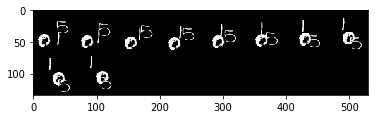

label


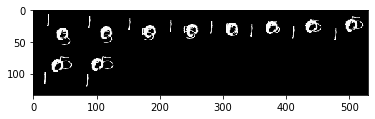

prediction


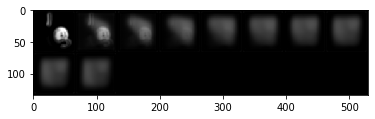

Epoch [23/30], Step [1000/10000], Loss: 0.0479
input


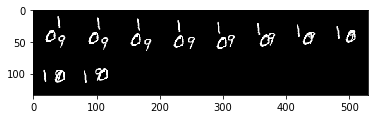

label


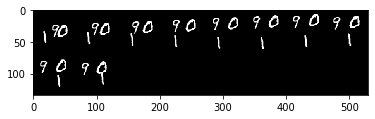

prediction


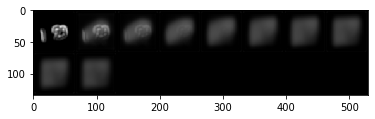

Epoch [23/30], Step [2000/10000], Loss: 0.0510
input


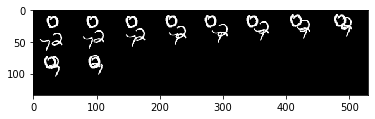

label


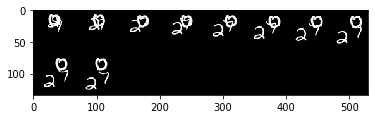

prediction


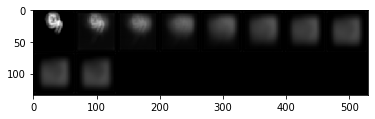

Epoch [23/30], Step [3000/10000], Loss: 0.0478
input


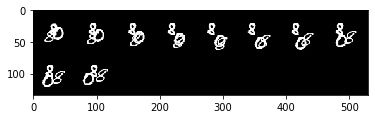

label


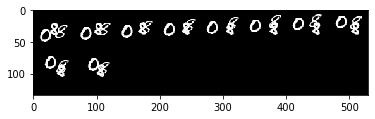

prediction


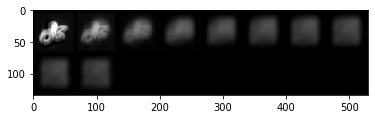

Epoch [23/30], Step [4000/10000], Loss: 0.0508
input


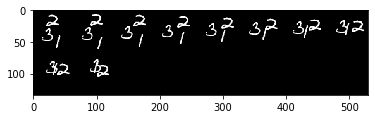

label


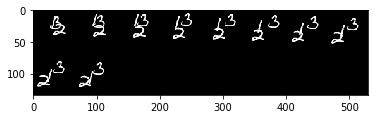

prediction


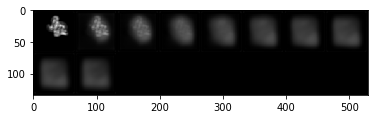

Epoch [23/30], Step [5000/10000], Loss: 0.0480
input


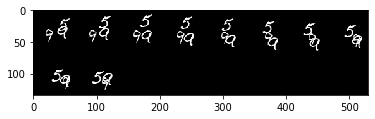

label


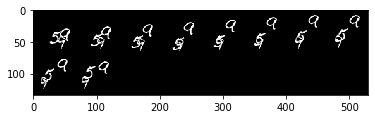

prediction


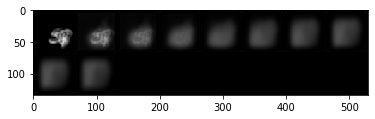

Epoch [23/30], Step [6000/10000], Loss: 0.0488
input


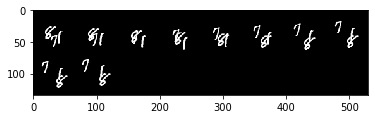

label


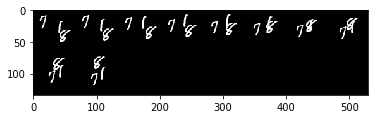

prediction


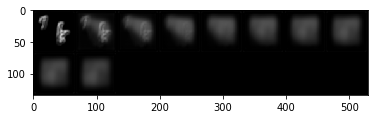

Epoch [23/30], Step [7000/10000], Loss: 0.0475
input


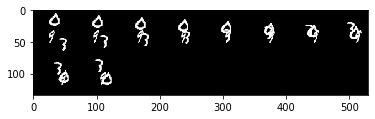

label


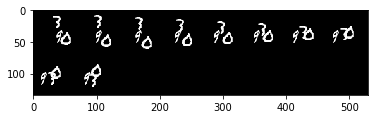

prediction


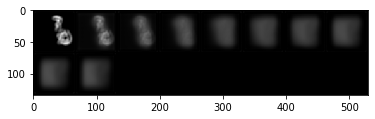

Epoch [23/30], Step [8000/10000], Loss: 0.0482
input


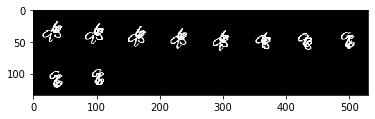

label


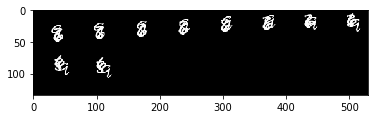

prediction


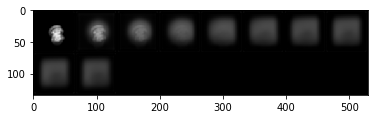

Epoch [23/30], Step [9000/10000], Loss: 0.0441
input


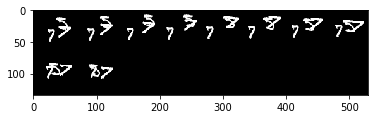

label


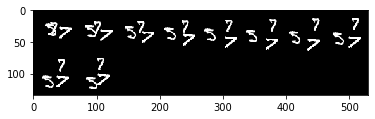

prediction


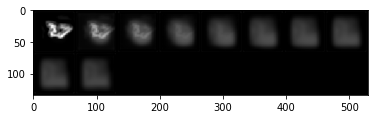

Epoch [23/30], Step [10000/10000], Loss: 0.0485
Epoch [24/30], Step [1000/10000], Loss: 0.0443
Epoch [24/30], Step [2000/10000], Loss: 0.0527
Epoch [24/30], Step [3000/10000], Loss: 0.0416
Epoch [24/30], Step [4000/10000], Loss: 0.0483
Epoch [24/30], Step [5000/10000], Loss: 0.0475
Epoch [24/30], Step [6000/10000], Loss: 0.0478
Epoch [24/30], Step [7000/10000], Loss: 0.0452
Epoch [24/30], Step [8000/10000], Loss: 0.0426
Epoch [24/30], Step [9000/10000], Loss: 0.0459
Epoch [24/30], Step [10000/10000], Loss: 0.0419
input


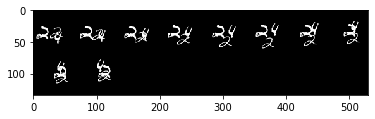

label


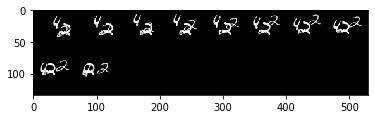

prediction


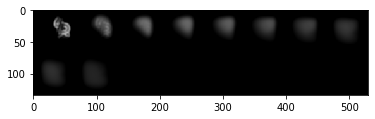

Epoch [24/30], Step [1000/10000], Loss: 0.0453
input


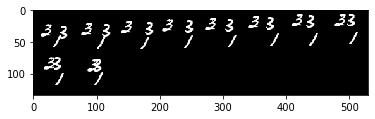

label


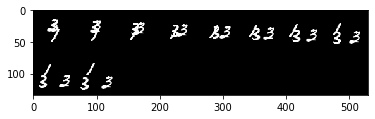

prediction


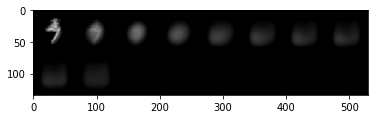

Epoch [24/30], Step [2000/10000], Loss: 0.0439
input


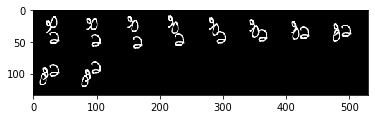

label


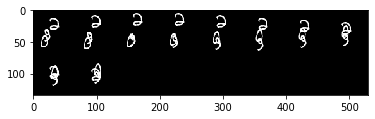

prediction


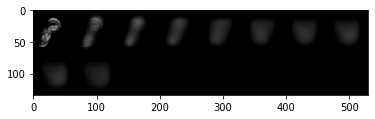

Epoch [24/30], Step [3000/10000], Loss: 0.0461
input


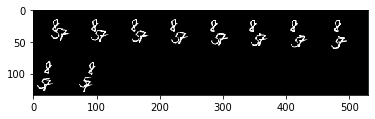

label


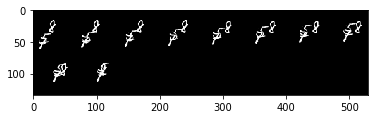

prediction


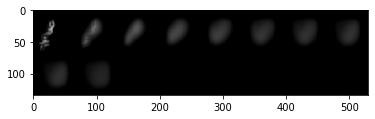

Epoch [24/30], Step [4000/10000], Loss: 0.0479
input


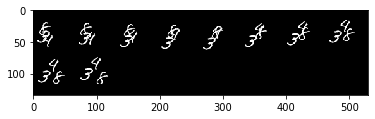

label


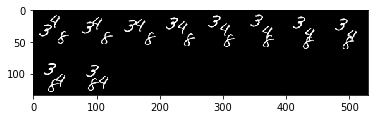

prediction


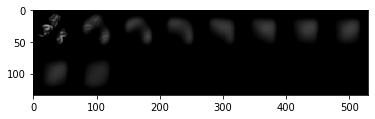

Epoch [24/30], Step [5000/10000], Loss: 0.0482
input


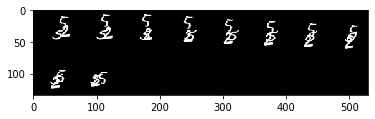

label


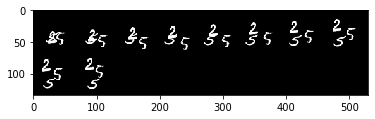

prediction


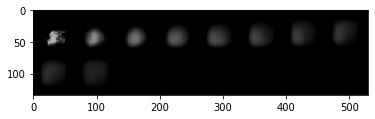

Epoch [24/30], Step [6000/10000], Loss: 0.0441
input


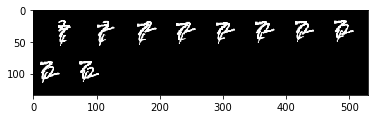

label


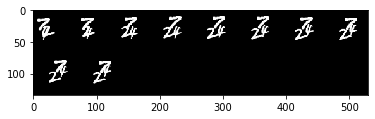

prediction


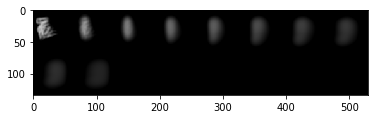

Epoch [24/30], Step [7000/10000], Loss: 0.0528
input


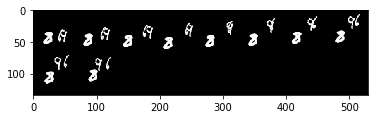

label


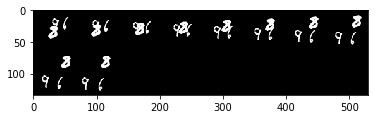

prediction


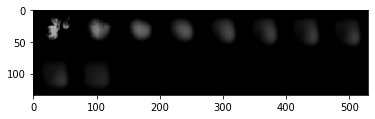

Epoch [24/30], Step [8000/10000], Loss: 0.0512
input


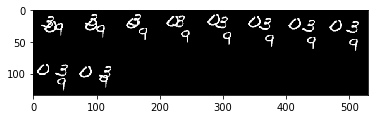

label


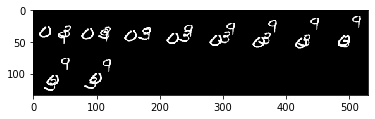

prediction


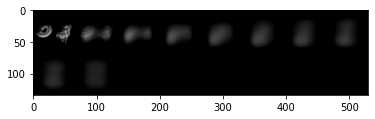

Epoch [24/30], Step [9000/10000], Loss: 0.0449
input


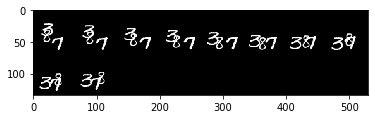

label


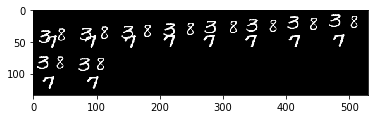

prediction


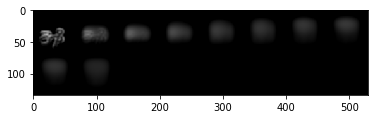

Epoch [24/30], Step [10000/10000], Loss: 0.0454
Epoch [25/30], Step [1000/10000], Loss: 0.0433
Epoch [25/30], Step [2000/10000], Loss: 0.0511
Epoch [25/30], Step [3000/10000], Loss: 0.0452
Epoch [25/30], Step [4000/10000], Loss: 0.0465
Epoch [25/30], Step [5000/10000], Loss: 0.0439
Epoch [25/30], Step [6000/10000], Loss: 0.0432
Epoch [25/30], Step [7000/10000], Loss: 0.0396
Epoch [25/30], Step [8000/10000], Loss: 0.0406
Epoch [25/30], Step [9000/10000], Loss: 0.0422
Epoch [25/30], Step [10000/10000], Loss: 0.0483
input


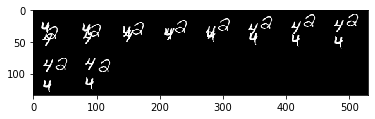

label


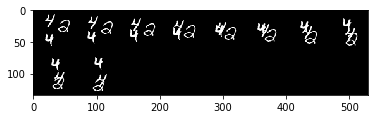

prediction


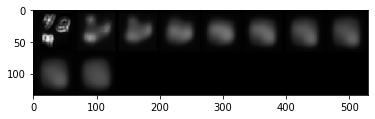

Epoch [25/30], Step [1000/10000], Loss: 0.0453
input


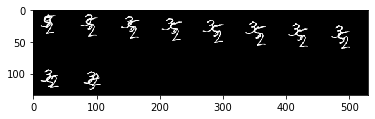

label


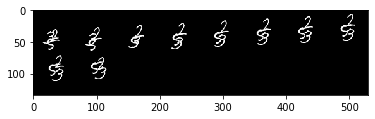

prediction


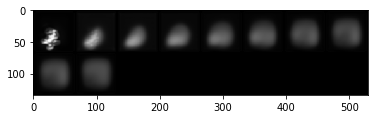

Epoch [25/30], Step [2000/10000], Loss: 0.0441
input


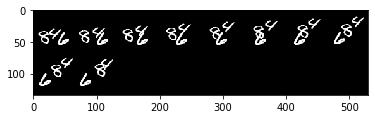

label


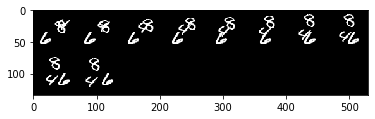

prediction


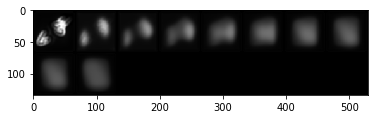

Epoch [25/30], Step [3000/10000], Loss: 0.0484
input


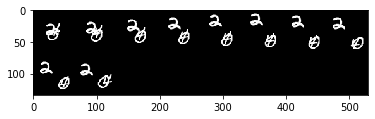

label


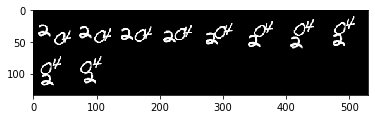

prediction


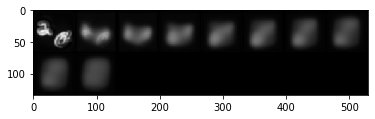

Epoch [25/30], Step [4000/10000], Loss: 0.0475
input


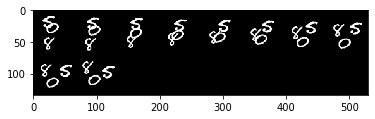

label


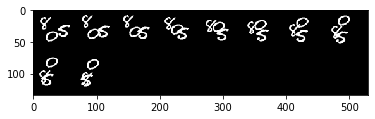

prediction


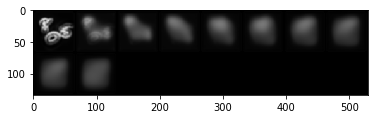

Epoch [25/30], Step [5000/10000], Loss: 0.0457
input


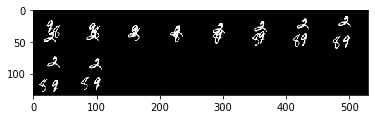

label


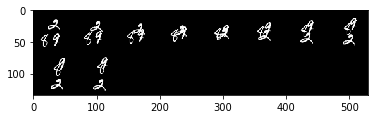

prediction


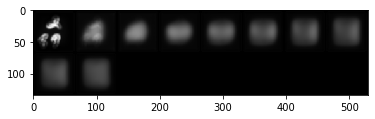

Epoch [25/30], Step [6000/10000], Loss: 0.0495
input


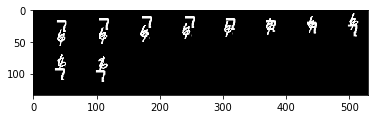

label


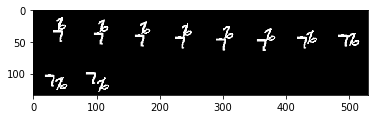

prediction


Epoch [25/30], Step [7000/10000], Loss: 0.0454
input


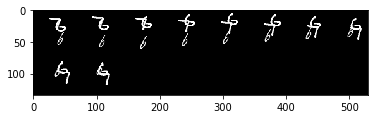

label


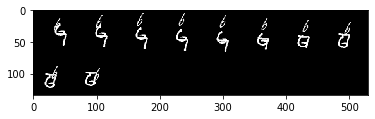

prediction


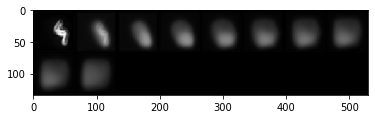

Epoch [25/30], Step [8000/10000], Loss: 0.0446
input


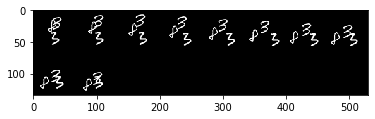

label


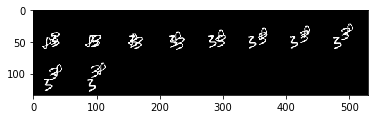

prediction


Epoch [25/30], Step [9000/10000], Loss: 0.0455
input


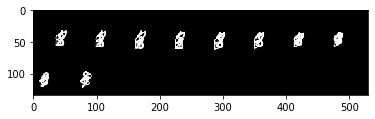

label


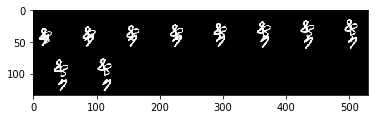

prediction


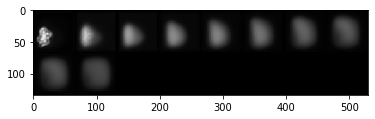

Epoch [25/30], Step [10000/10000], Loss: 0.0516
Epoch [26/30], Step [1000/10000], Loss: 0.0514
Epoch [26/30], Step [2000/10000], Loss: 0.0427
Epoch [26/30], Step [3000/10000], Loss: 0.0408
Epoch [26/30], Step [4000/10000], Loss: 0.0455
Epoch [26/30], Step [5000/10000], Loss: 0.0492
Epoch [26/30], Step [6000/10000], Loss: 0.0451
Epoch [26/30], Step [7000/10000], Loss: 0.0465
Epoch [26/30], Step [8000/10000], Loss: 0.0421
Epoch [26/30], Step [9000/10000], Loss: 0.0428
Epoch [26/30], Step [10000/10000], Loss: 0.0449
input


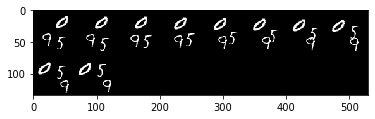

label


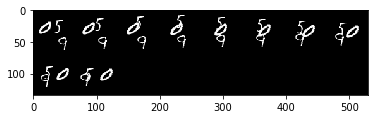

prediction


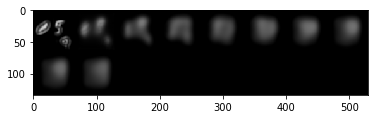

Epoch [26/30], Step [1000/10000], Loss: 0.0422
input


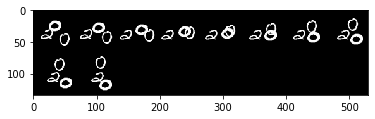

label


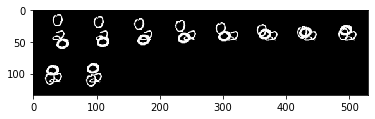

prediction


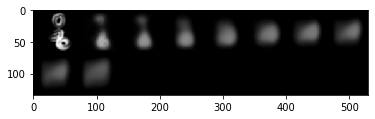

Epoch [26/30], Step [2000/10000], Loss: 0.0463
input


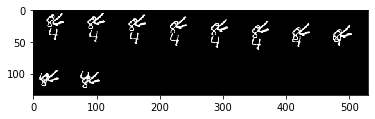

label


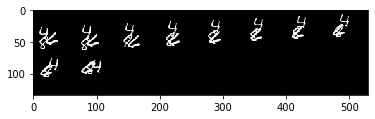

prediction


Epoch [26/30], Step [3000/10000], Loss: 0.0398
input


label


prediction


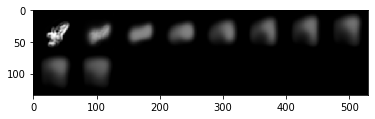

Epoch [26/30], Step [4000/10000], Loss: 0.0476
input


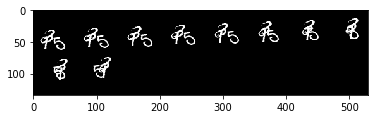

label


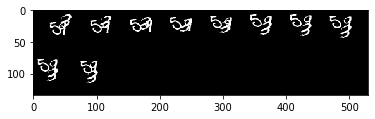

prediction


Epoch [26/30], Step [5000/10000], Loss: 0.0460
input


label


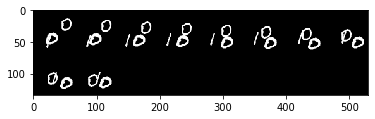

prediction


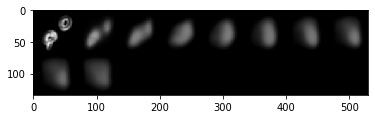

Epoch [26/30], Step [6000/10000], Loss: 0.0448
input


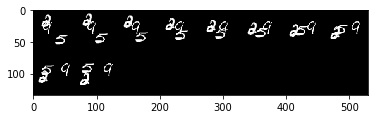

label


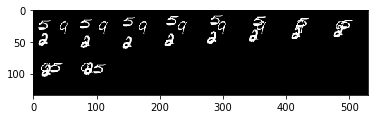

prediction


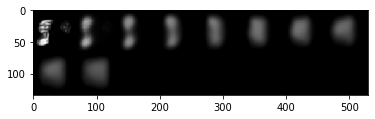

Epoch [26/30], Step [7000/10000], Loss: 0.0464
input


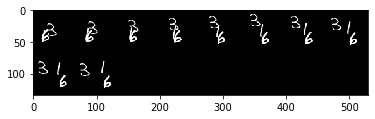

label


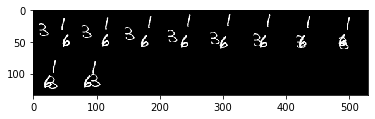

prediction


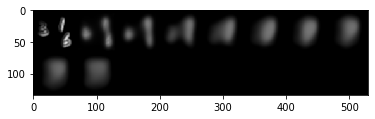

Epoch [26/30], Step [8000/10000], Loss: 0.0461
input


label


prediction


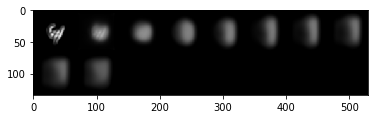

Epoch [26/30], Step [9000/10000], Loss: 0.0398
input


label


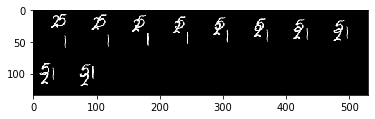

prediction


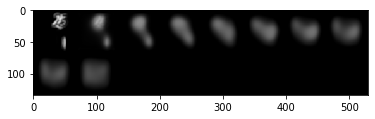

Epoch [26/30], Step [10000/10000], Loss: 0.0421
Epoch [27/30], Step [1000/10000], Loss: 0.0442
Epoch [27/30], Step [2000/10000], Loss: 0.0426
Epoch [27/30], Step [3000/10000], Loss: 0.0440
Epoch [27/30], Step [4000/10000], Loss: 0.0474
Epoch [27/30], Step [5000/10000], Loss: 0.0476
Epoch [27/30], Step [6000/10000], Loss: 0.0390
Epoch [27/30], Step [7000/10000], Loss: 0.0449
Epoch [27/30], Step [8000/10000], Loss: 0.0459
Epoch [27/30], Step [9000/10000], Loss: 0.0441
Epoch [27/30], Step [10000/10000], Loss: 0.0459
input


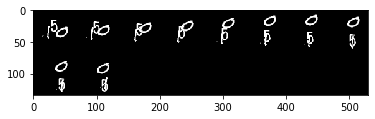

label


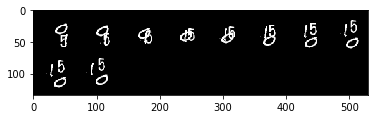

prediction


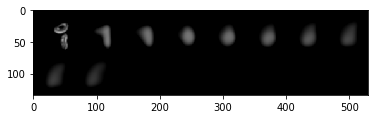

Epoch [27/30], Step [1000/10000], Loss: 0.0451
input


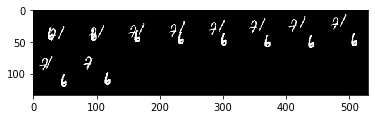

label


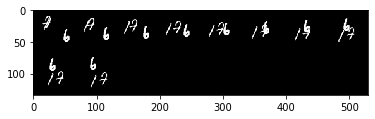

prediction


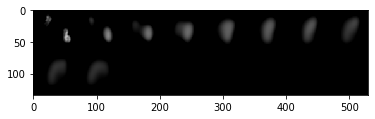

Epoch [27/30], Step [2000/10000], Loss: 0.0435
input


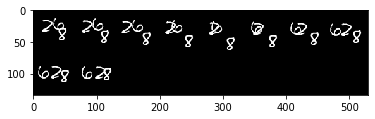

label


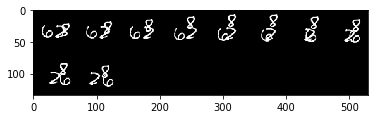

prediction


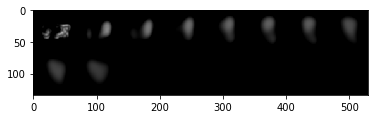

Epoch [27/30], Step [3000/10000], Loss: 0.0457
input


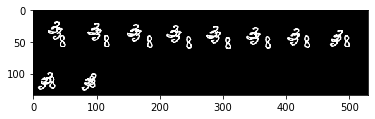

label


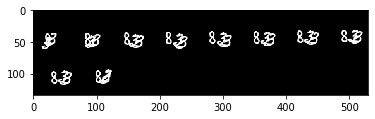

prediction


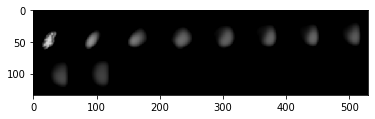

Epoch [27/30], Step [4000/10000], Loss: 0.0515
input


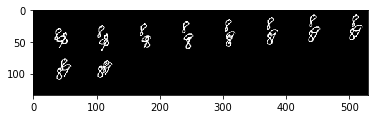

label


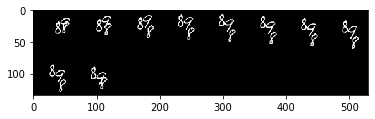

prediction


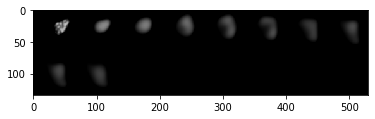

Epoch [27/30], Step [5000/10000], Loss: 0.0461
input


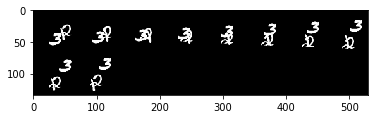

label


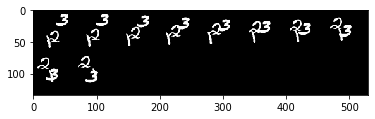

prediction


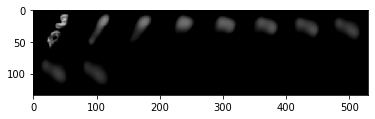

Epoch [27/30], Step [6000/10000], Loss: 0.0478
input


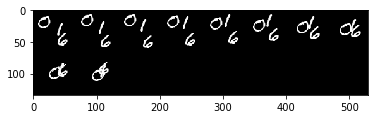

label


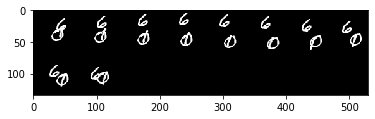

prediction


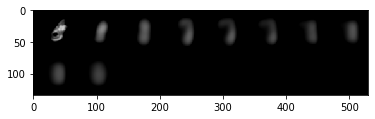

Epoch [27/30], Step [7000/10000], Loss: 0.0456
input


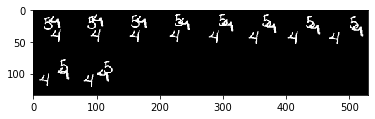

label


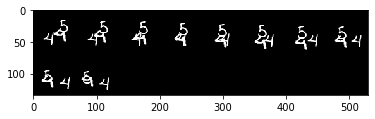

prediction


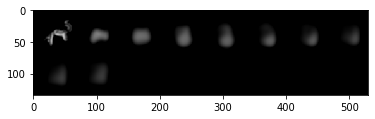

Epoch [27/30], Step [8000/10000], Loss: 0.0471
input


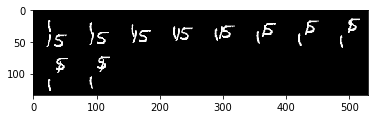

label


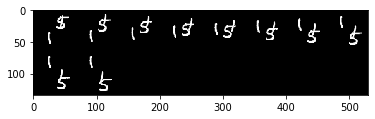

prediction


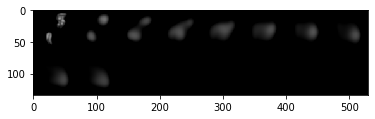

Epoch [27/30], Step [9000/10000], Loss: 0.0475
input


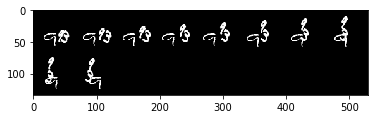

label


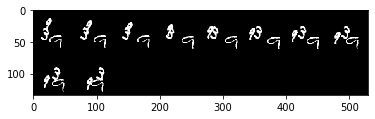

prediction


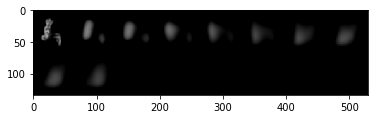

Epoch [27/30], Step [10000/10000], Loss: 0.0484
Epoch [28/30], Step [1000/10000], Loss: 0.0497
Epoch [28/30], Step [2000/10000], Loss: 0.0465
Epoch [28/30], Step [3000/10000], Loss: 0.0435
Epoch [28/30], Step [4000/10000], Loss: 0.0413
Epoch [28/30], Step [5000/10000], Loss: 0.0460
Epoch [28/30], Step [6000/10000], Loss: 0.0471
Epoch [28/30], Step [7000/10000], Loss: 0.0418
Epoch [28/30], Step [8000/10000], Loss: 0.0446
Epoch [28/30], Step [9000/10000], Loss: 0.0418
Epoch [28/30], Step [10000/10000], Loss: 0.0426
input


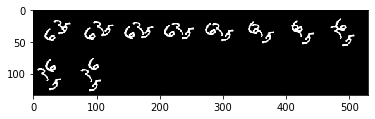

label


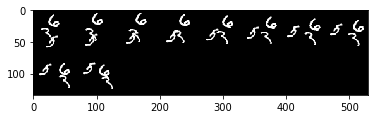

prediction


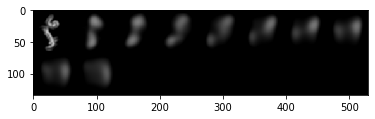

Epoch [28/30], Step [1000/10000], Loss: 0.0429
input


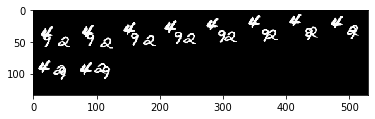

label


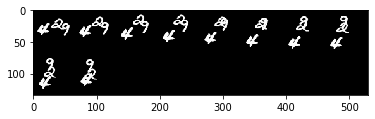

prediction


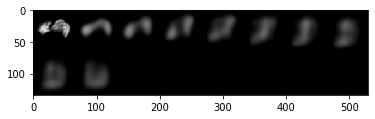

Epoch [28/30], Step [2000/10000], Loss: 0.0430
input


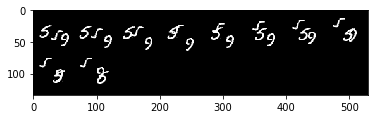

label


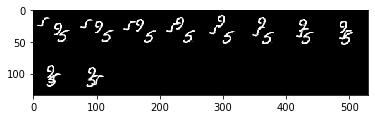

prediction


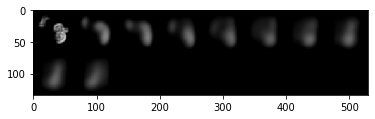

Epoch [28/30], Step [3000/10000], Loss: 0.0390
input


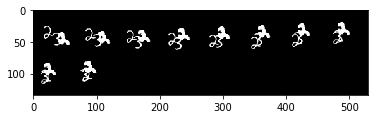

label


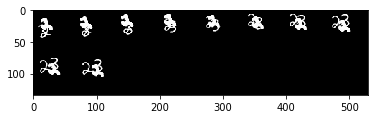

prediction


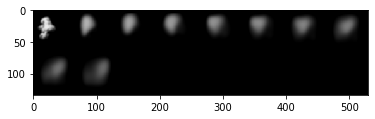

Epoch [28/30], Step [4000/10000], Loss: 0.0456
input


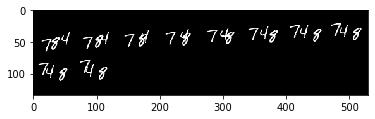

label


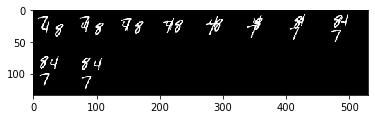

prediction


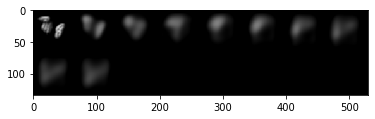

Epoch [28/30], Step [5000/10000], Loss: 0.0402
input


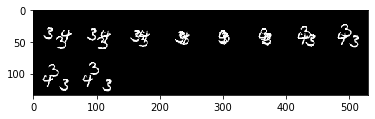

label


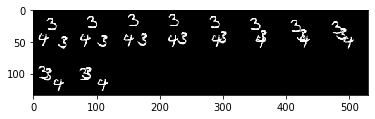

prediction


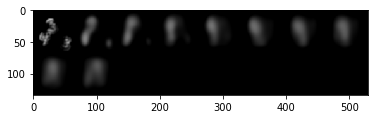

Epoch [28/30], Step [6000/10000], Loss: 0.0469
input


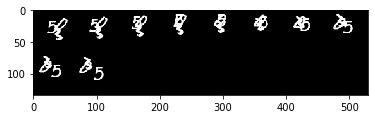

label


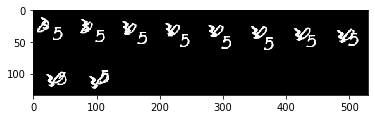

prediction


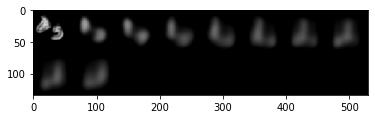

Epoch [28/30], Step [7000/10000], Loss: 0.0371
input


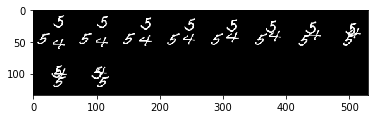

label


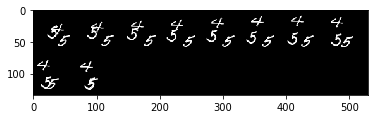

prediction


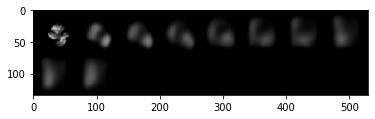

Epoch [28/30], Step [8000/10000], Loss: 0.0438
input


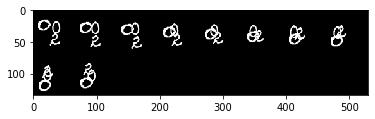

label


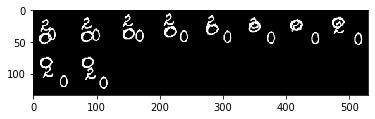

prediction


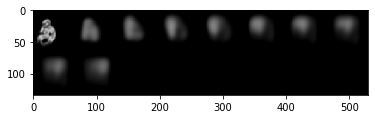

Epoch [28/30], Step [9000/10000], Loss: 0.0429
input


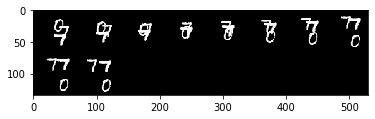

label


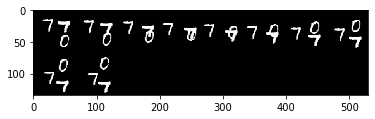

prediction


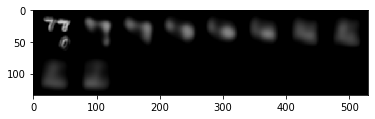

Epoch [28/30], Step [10000/10000], Loss: 0.0453
Epoch [29/30], Step [1000/10000], Loss: 0.0423
Epoch [29/30], Step [2000/10000], Loss: 0.0432
Epoch [29/30], Step [3000/10000], Loss: 0.0417
Epoch [29/30], Step [4000/10000], Loss: 0.0444
Epoch [29/30], Step [5000/10000], Loss: 0.0463
Epoch [29/30], Step [6000/10000], Loss: 0.0360
Epoch [29/30], Step [7000/10000], Loss: 0.0439
Epoch [29/30], Step [8000/10000], Loss: 0.0436
Epoch [29/30], Step [9000/10000], Loss: 0.0453
Epoch [29/30], Step [10000/10000], Loss: 0.0485
input


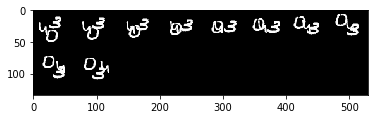

label


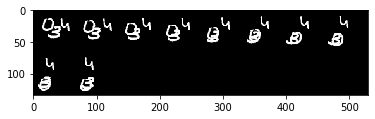

prediction


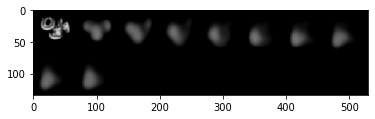

Epoch [29/30], Step [1000/10000], Loss: 0.0422
input


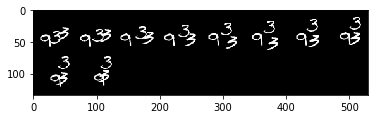

label


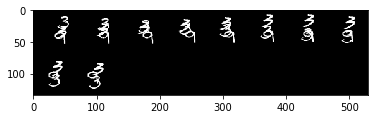

prediction


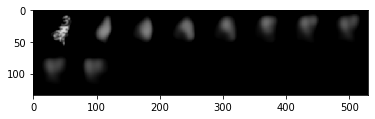

Epoch [29/30], Step [2000/10000], Loss: 0.0448
input


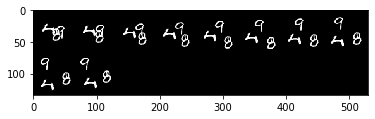

label


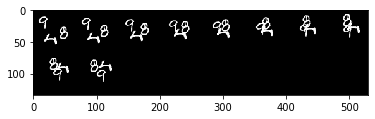

prediction


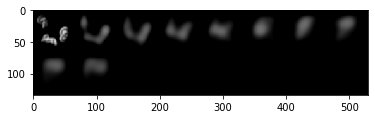

Epoch [29/30], Step [3000/10000], Loss: 0.0467
input


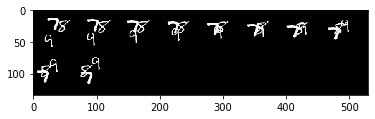

label


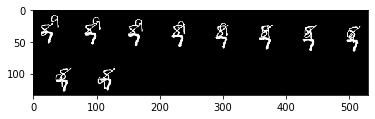

prediction


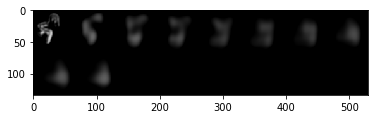

Epoch [29/30], Step [4000/10000], Loss: 0.0385
input


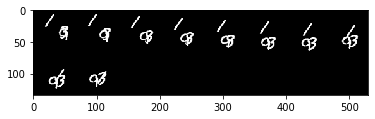

label


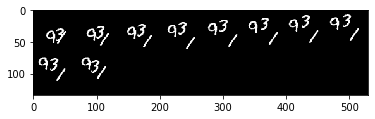

prediction


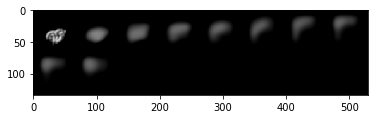

Epoch [29/30], Step [5000/10000], Loss: 0.0466
input


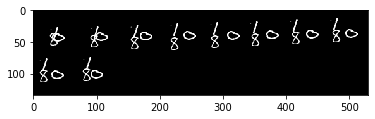

label


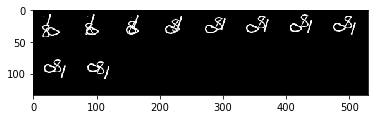

prediction


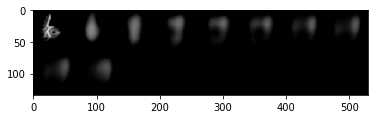

Epoch [29/30], Step [6000/10000], Loss: 0.0447
input


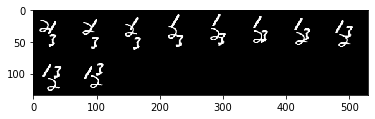

label


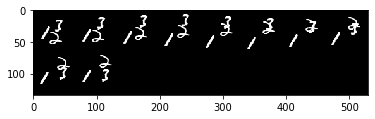

prediction


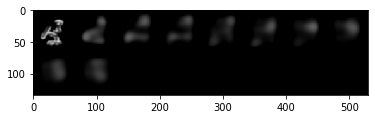

Epoch [29/30], Step [7000/10000], Loss: 0.0470
input


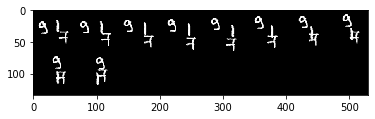

label


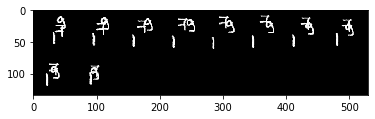

prediction


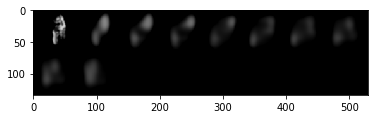

Epoch [29/30], Step [8000/10000], Loss: 0.0424
input


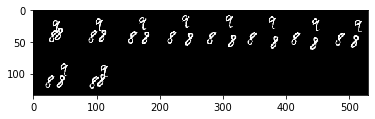

label


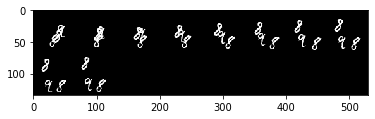

prediction


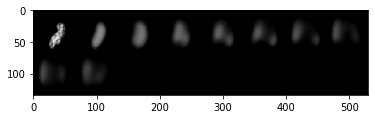

Epoch [29/30], Step [9000/10000], Loss: 0.0383
input


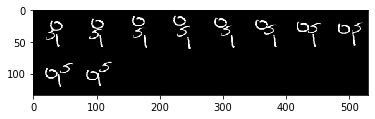

label


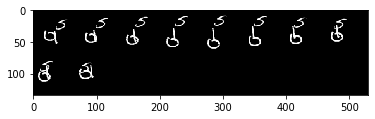

prediction


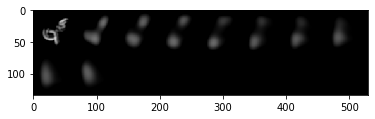

Epoch [29/30], Step [10000/10000], Loss: 0.0454
Epoch [30/30], Step [1000/10000], Loss: 0.0455
Epoch [30/30], Step [2000/10000], Loss: 0.0407
Epoch [30/30], Step [3000/10000], Loss: 0.0388
Epoch [30/30], Step [4000/10000], Loss: 0.0397
Epoch [30/30], Step [5000/10000], Loss: 0.0390
Epoch [30/30], Step [6000/10000], Loss: 0.0395
Epoch [30/30], Step [7000/10000], Loss: 0.0412
Epoch [30/30], Step [8000/10000], Loss: 0.0423
Epoch [30/30], Step [9000/10000], Loss: 0.0423
Epoch [30/30], Step [10000/10000], Loss: 0.0395
input


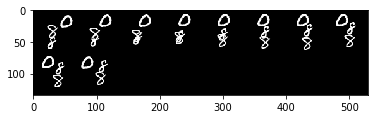

label


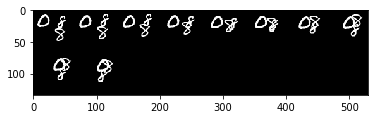

prediction


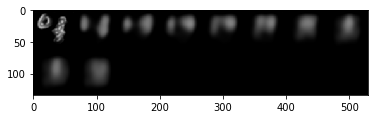

Epoch [30/30], Step [1000/10000], Loss: 0.0438
input


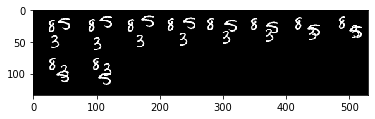

label


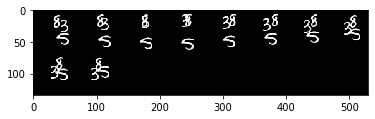

prediction


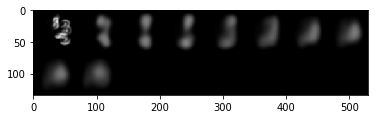

Epoch [30/30], Step [2000/10000], Loss: 0.0399
input


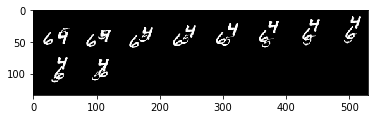

label


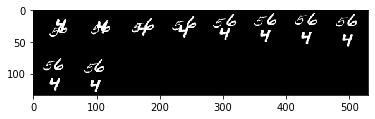

prediction


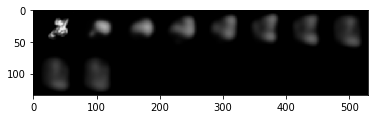

Epoch [30/30], Step [3000/10000], Loss: 0.0447
input


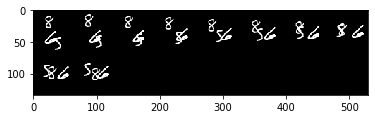

label


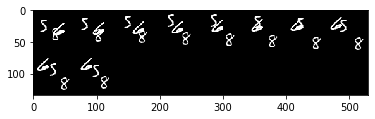

prediction


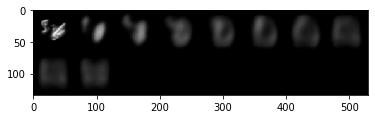

Epoch [30/30], Step [4000/10000], Loss: 0.0438
input


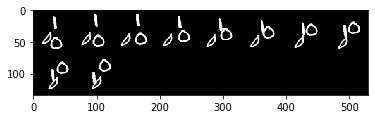

label


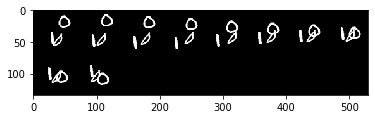

prediction


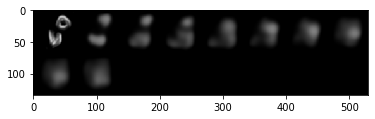

Epoch [30/30], Step [5000/10000], Loss: 0.0408
input


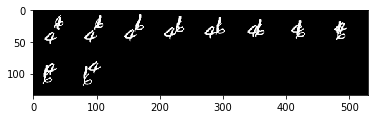

label


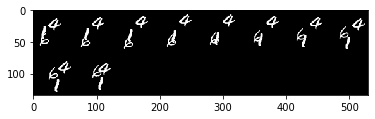

prediction


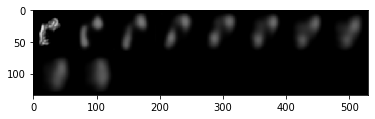

Epoch [30/30], Step [6000/10000], Loss: 0.0415
input


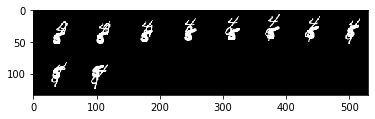

label


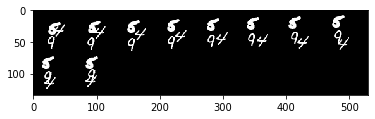

prediction


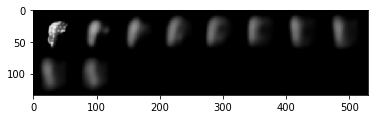

Epoch [30/30], Step [7000/10000], Loss: 0.0405
input


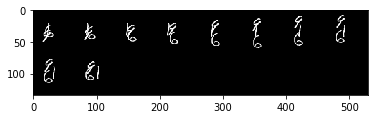

label


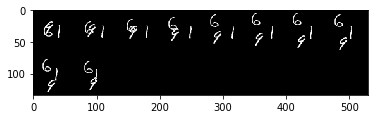

prediction


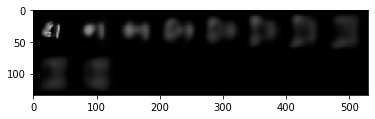

Epoch [30/30], Step [8000/10000], Loss: 0.0403
input


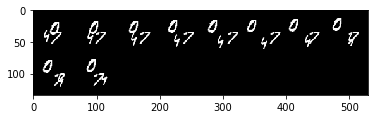

label


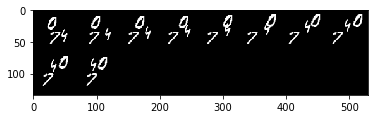

prediction


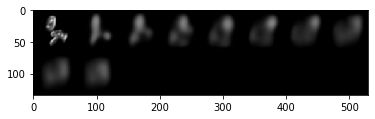

Epoch [30/30], Step [9000/10000], Loss: 0.0430
input


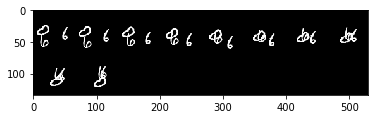

label


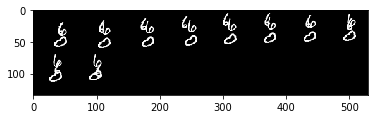

prediction


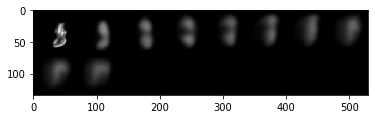

Epoch [30/30], Step [10000/10000], Loss: 0.0423


In [3]:
frames_input = 10
frames_output = 10
batch_size = 10
lr = 0.1
epochs = 30
print_period = 1000

# Setting cuda
cuda_num = 0
device = torch.device(f'cuda:{cuda_num}' if torch.cuda.is_available() else 'cpu')
torch.cuda.set_device(device)

trainFolder = MovingMNIST(is_train=True, root='data/', n_frames_input=frames_input, n_frames_output=frames_output, num_objects=[3])
validFolder = MovingMNIST(is_train=False, root='data/', n_frames_input=frames_input, n_frames_output=frames_output, num_objects=[3])
trainLoader = torch.utils.data.DataLoader(trainFolder, batch_size=batch_size, shuffle=False)
validLoader = torch.utils.data.DataLoader(validFolder, batch_size=batch_size, shuffle=False)

encoder_params = convlstm_encoder_params
decoder_params = convlstm_decoder_params
encoder = Encoder(encoder_params[0], encoder_params[1]).cuda()
decoder = Decoder(decoder_params[0], decoder_params[1]).cuda()

net = ED(encoder, decoder)
net.to(device)

criterion = nn.MSELoss().cuda()
optimizer = optim.Adam(net.parameters(), lr=lr)
pla_lr_scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.5, patience=4, verbose=True)

for epoch in range(epochs):
    # Training
    net.train()
    for i, (idx, targetVar, inputVar, _, _) in enumerate(trainLoader):
    
        inputs = inputVar.to(device)  # B,S,C,H,W
        label = targetVar.to(device)  # B,S,C,H,W
        pred = net(inputs)  # B,S,C,H,W
        loss = criterion(pred, label)

        optimizer.zero_grad()
        loss.backward()

        torch.nn.utils.clip_grad_value_(net.parameters(), clip_value=10.0)
        
        optimizer.step()

        if (i+1) % (print_period/batch_size) == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format
            (epoch+1, epochs, (i+1)*batch_size, len(trainLoader)*batch_size, loss.item()))

    # Validations
    net.eval()
    with torch.no_grad():
        for i, (idx, targetVar, inputVar, _, _) in enumerate(validLoader):
            
            inputs = inputVar.to(device)
            label = targetVar.to(device)
            pred = net(inputs)
            loss = criterion(pred, label)
            
            if (i+1) % (print_period/batch_size) == 0:
                if epoch+1 >= 15:
                    print('input')
                    imshow(inputs)
                    print('label')
                    imshow(label)
                    print('prediction')
                    imshow(pred)
                print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format
            (epoch+1, epochs, (i+1)*batch_size, len(validLoader)*batch_size, loss.item()))